# Introduction

The Project is to build a model to improve the Zestimate residual error. 

   $ logerror=log(Zestimate)−log(SalePrice) $ 

“Zestimates” are Zillow's estimated home values. The model is to predict the difference between the Zillow's estimated home value, Zestimate, and the actual sale price. 

## Data

We have 4 files. We merge properties_2016.csv and train_2016.csv to make a training data which has 90275 data points(houses). For a test data, we merge properties_2017.csv and test_2017.csv. The test data has 77613 data points.  

   **properties_2016.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, 
                           California) data in 2016.

   **train_2016.csv**: all the transactions before October 15, 2016, plus some of the transactions after October 
                      15,2016. It contains parcel ID ,  transaction date and calculated log error . 

   **properties_2017.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura,
                           California) data in 2017.

   **test_2017.csv**: all the transactions from Jan 1, 2017 to Sep 25, 2017. It can be used as a test dataset.



In [1]:
#import a necessary module

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

# read files

path_properties_2016 ='/Users/kim.jiy/Documents/SpringBoard/capstone1_work/zillow/properties_2016.csv'

df_properties_2016 = pd.read_csv(path_properties_2016, low_memory=False)

path_train_2016 ='/Users/kim.jiy/Documents/SpringBoard/capstone1_work/zillow/train_2016.csv'
df_train_2016 = pd.read_csv(path_train_2016 , parse_dates=["transactiondate"], low_memory=False)


In [2]:
# merge training and properties data for 2016 and 2017

df_train_2016 = pd.merge(df_train_2016, df_properties_2016, how='inner', on='parcelid')


In [3]:
# Shape of train data

df_train_2016.shape

(90275, 60)

In [4]:
df_train_2016.head().transpose()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN


In [5]:
df_train_2016.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
logerror,90275.0,1.145722e-02,1.610788e-01,-4.605000e+00,-2.530000e-02,6.000000e-03,3.920000e-02,4.737000e+00
airconditioningtypeid,28781.0,1.816372e+00,2.974168e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,57364.0,5.565407e+00,1.900602e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [6]:
df_train_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

# Data Wrangling

## Data Cleaning

I explored training data. 125 duplicated parcelid for 2016 data and 199 duplicated parcelid for 2017 data were found. However, it meant they were trasacted for more than twice for a year. so it didn't have any problem.



In [7]:
df_train_2016.shape
sum(df_train_2016.duplicated('parcelid'))

125

In [9]:
# Check if negative values in each column. Two columns, logerror and longitude, have negative values which are reasonable. 

df_train_2016.describe().loc["min",:][ df_train_2016.describe().loc["min",:] < 0 ]

logerror    -4.605000e+00
longitude   -1.194479e+08
Name: min, dtype: float64

In [10]:
# Check if columns with object type have unusual cells. 

# there are 5 columns with a object type

df_train_2016.loc[:, df_train_2016.dtypes == np.object].columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [11]:
# check 5 columns to see if they have unnual cells. 

df_train_2016["hashottuborspa"].unique() , df_train_2016["propertycountylandusecode"].unique() , df_train_2016["propertyzoningdesc"].unique(), df_train_2016["fireplaceflag"].unique(), df_train_2016["taxdelinquencyflag"].unique()

(array([nan, True], dtype=object),
 array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
        '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
        '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
        '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
        '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
        '1720', '1011', '1432', '0401', '0102', '012D', '73', '105',
        '0110', '100V', '0130', '8800', '0303', '0210', '1012', '1333',
        '0114', '01DD', '020G', '040A', '012E', '020M', '040V', '070D',
        '1200', '030G', '1722', '6050', '1421', '010', nan, '200', '0',
        '1420', '0131', '0301'], dtype=object),
 array(['LARS', nan, 'PSR6', ..., 'SHCG', 'COR2YY', 'LNR2RPD-R3'],
       dtype=object),
 array([nan, True], dtype=object),
 array([nan, 'Y'], dtype=object))

## Missing Values

Let's check how many missing value each column has. 

I found that 47 columns have missing values.

18 columns among them have more than 95% of missing values and 29 columns with more than 60% of missing values


In [12]:
# Store any columns with missing value to df_2016_missing

df_2016_missing = df_train_2016.isnull().sum(axis=0).reset_index()
df_2016_missing.columns = ["col_name",'non_missing_values']


df_2016_missing = df_2016_missing[df_2016_missing.non_missing_values != 0]
df_2016_missing['missing_values'] =len(df_train_2016) - df_2016_missing['non_missing_values']
df_2016_missing['ratio'] =df_2016_missing['non_missing_values']/len(df_train_2016)

missing_values = df_2016_missing.sort_values(by='ratio', ascending=False )
missing_values.reset_index(drop=True,inplace=True)

In [13]:
len(missing_values[missing_values['ratio']>0.95]) 

18

In [14]:
len(missing_values[missing_values['ratio']>0.60])

29

In [15]:
missing_values[missing_values['ratio']>0.60].col_name

0          buildingclasstypeid
1         finishedsquarefeet13
2                 basementsqft
3                  storytypeid
4           yardbuildingsqft26
5                fireplaceflag
6     architecturalstyletypeid
7       typeconstructiontypeid
8          finishedsquarefeet6
9                   decktypeid
10                 poolsizesum
11                pooltypeid10
12                 pooltypeid2
13          taxdelinquencyflag
14          taxdelinquencyyear
15              hashottuborspa
16          yardbuildingsqft17
17        finishedsquarefeet15
18    finishedfloor1squarefeet
19        finishedsquarefeet50
20                fireplacecnt
21         threequarterbathnbr
22                 pooltypeid7
23                     poolcnt
24             numberofstories
25       airconditioningtypeid
26             garagetotalsqft
27                garagecarcnt
28        regionidneighborhood
Name: col_name, dtype: object

Let's explore columns which have missing values ; 

- **buildingclasstypeid** : The building framing type , 99.98% missing
- **finishedsquarefeet13** : Perimeter  living area  , 99.96% missing
- **basementsqft** : Finished living area below or partially below ground level , 99.95% missing
- **storytypeid** : Type of floors in a multi-story house , 99.95% missing
- **yardbuildingsqft26** : Storage shed/building in yard , 99.89% missing
- **fireplaceflag** :	 Is a fireplace present in this home 
- **architecturalstyletypeid** :	 Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
- **typeconstructiontypeid** :	 What type of construction material was used to construct the home
- **finishedsquarefeet6** :	Base unfinished and finished area
- **decktypeid** :	Type of deck (if any) present on parcel
- **poolsizesum** :	 Total square footage of all pools on property
- **pooltypeid10** :	 Spa or Hot Tub
- **pooltypeid2** :	 Pool with Spa/Hot Tub
- **taxdelinquencyflag** :	Property taxes for this parcel are past due as of 2015
- **taxdelinquencyyear** :	Year for which the unpaid propert taxes were due 
- **hashottuborspa** :	 Does the home have a hot tub or spa
- **yardbuildingsqft17** :	Patio in  yard
- **finishedsquarefeet15** :	Total area
- **finishedfloor1squarefeet** :	 Size of the finished living area on the first (entry) floor of the home
- **finishedsquarefeet50** :	 Size of the finished living area on the first (entry) floor of the home
- **fireplacecnt** :	 Number of fireplaces in a home (if any)
- **threequarterbathnbr** :	 Number of 3/4 bathrooms in house (shower + sink + toilet)
- **pooltypeid7** :	 Pool without hot tub
- **poolcnt** :	 Number of pools on the lot (if any)
- **numberofstories** :	 Number of stories or levels the home has
- **airconditioningtypeid** :	 Type of cooling system present in the home (if any)
- **garagetotalsqft** :	 Total number of square feet of all garages on lot including an attached garage
- **garagecarcnt** :	 Total number of garages on the lot including an attached garage
- **regionidneighborhood** :	Neighborhood in which the property is located
- **heatingorsystemtypeid** :	 Type of home heating system
- **buildingqualitytypeid** :	 Overall assessment of condition of the building from best (lowest) to worst (highest)
- **propertyzoningdesc** :	 Description of the allowed land uses (zoning) for that property
- **unitcnt** :	 Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
- **lotsizesquarefeet** :	 Area of the lot in square feet
- **finishedsquarefeet12** :	Finished living area
- **regionidcity** :	 City in which the property is located (if any)
- **fullbathcnt** :	 Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- **calculatedbathnbr** :	 Number of bathrooms in home including fractional bathroom
- **yearbuilt** :	 The Year the principal residence was built 
- **calculatedfinishedsquarefeet** :	 Calculated total finished living area of the home 
- **censustractandblock** :	 Census tract and block ID combined - also contains blockgroup assignment by extension
- **structuretaxvaluedollarcnt** :	The assessed value of the built structure on the parcel
- **regionidzip** :	 Zip code in which the property is located
- **taxamount** :	The total property tax assessed for that assessment year
- **taxvaluedollarcnt** :	The total tax assessed value of the parcel
- **landtaxvaluedollarcnt** :	The assessed value of the land area of the parcel
- **propertycountylandusecode** :	 County land use code i.e. it's zoning at the county level

In [16]:
df_train_2016[['buildingclasstypeid', 'finishedsquarefeet13','basementsqft','storytypeid','yardbuildingsqft26','fireplaceflag','architecturalstyletypeid','typeconstructiontypeid','finishedsquarefeet6','decktypeid','poolsizesum','pooltypeid10','pooltypeid2','taxdelinquencyflag','taxdelinquencyyear','hashottuborspa','yardbuildingsqft17','finishedsquarefeet15','finishedfloor1squarefeet','finishedsquarefeet50','fireplacecnt','threequarterbathnbr','pooltypeid7','poolcnt','numberofstories','airconditioningtypeid','garagetotalsqft','garagecarcnt','regionidneighborhood','heatingorsystemtypeid','buildingqualitytypeid','propertyzoningdesc','unitcnt','lotsizesquarefeet','finishedsquarefeet12','regionidcity','fullbathcnt','calculatedbathnbr','yearbuilt','calculatedfinishedsquarefeet','censustractandblock','structuretaxvaluedollarcnt','regionidzip','taxamount','taxvaluedollarcnt','landtaxvaluedollarcnt','propertycountylandusecode']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
finishedsquarefeet13,33.0,1.404545e+03,1.101082e+02,1.056000e+03,1.392000e+03,1.440000e+03,1.440000e+03,1.584000e+03
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
storytypeid,43.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
yardbuildingsqft26,95.0,3.116947e+02,3.463549e+02,1.800000e+01,1.000000e+02,1.590000e+02,3.610000e+02,1.366000e+03
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
typeconstructiontypeid,299.0,6.010033e+00,4.372347e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
finishedsquarefeet6,421.0,2.302546e+03,1.346255e+03,2.570000e+02,1.112000e+03,2.028000e+03,3.431000e+03,7.224000e+03
decktypeid,658.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
poolsizesum,969.0,5.198277e+02,1.550542e+02,2.800000e+01,4.200000e+02,5.000000e+02,6.000000e+02,1.750000e+03


In [17]:
# function to visulize each variables 

def visualize_feature(df, feature, val_type = "categ", bins = 1 ):
    
    # val_type = 'categ' for categorical values and 'cts' for continuous values
    if val_type == "categ":
        #Group mean and count of logerror for categorical values
        group = df.groupby(feature).logerror.agg(['mean', 'count','max','min'])
        
    else:
        #Group mean and count of logerror for continuous values
        group = df.groupby(pd.cut(df[feature], bins)).logerror.agg(['mean', 'count','max','min'])
            
        
    # mean and count of logerror for missingn value
    missing = df[df[feature].isnull()].logerror.agg(['mean', 'count']) 
    
    missing_mean = pd.DataFrame(missing.iloc[0], columns=['mean'],index = ['missing'])
    missing_count = pd.DataFrame(missing.iloc[1], columns=['count'],index = ['missing'])
    
    
    # Create dataframe for groupe mean of logerror
    frames_mean = [missing_mean ,pd.DataFrame(group.loc[:, 'mean'])]
    frames_count = [missing_count ,pd.DataFrame(group.loc[:, 'count'])]

    

    print(pd.concat(frames_mean))
    print(pd.concat(frames_count))
    print(pd.DataFrame(group))
    
    
    # Draw plot
    pd.concat(frames_mean).plot(kind='bar') 
    plt.show() 
    
    pd.concat(frames_count).plot(kind='bar') 
    plt.show() 
    



**1) buildingclasstypeid**

the building framing type such as steel frame, wood frame or concrete/brick.  
number of non-missing value : 16 out of 90275  
ratio of missing value :0.999823

Only 16 cells out of 90275 cells have the same value that is '4' and rest of them have all missing values. The '4' means that buildings have wood or wood and steel frames. It is not reasonable to replace missing values with other statics such as mean or median etc since most of them are missing. So I will delete the column. 

In [18]:
df_train_2016['buildingclasstypeid'].unique() 

array([nan,  4.])

In [19]:
# store variables to be removed to "Drop" at "dict_column"

dict_column= {"Drop":[],"Fill_0":[],"Fill_mean":[],"Categorical":[]}

dict_column["Drop"].append('buildingclasstypeid')


**2) finishedsquarefeet13**

perimeter living area has 33 cells 
Number of non-missing value : 33 out of 90275  
Ratio of missing value : 0.999634

Every building has different sizes of living area so it is hard to decide what value to fill out for missing values. So I will delete the column as well. 

In [20]:
df_train_2016["finishedsquarefeet13"].unique() 

array([  nan, 1392., 1440., 1536., 1344., 1566., 1464., 1152., 1584.,
       1248., 1416., 1056.])

In [21]:
dict_column["Drop"].append('finishedsquarefeet13')


**3) basementsqft**

Finished living area below or partially below ground level.
number of non-missing value :  43 out of 90275  
ratio of missing value : 0.999524

Therefore missing value might mean that it has no finished living room below ground level. So I will fill missing values with 0.  


In [22]:
df_train_2016["basementsqft"].unique() 

array([  nan,  814.,  330.,  168.,  671., 1555., 1528.,  771.,  700.,
        831., 1048., 1312.,  690.,  564.,  198.,  676.,  184.,  540.,
        260.,  557.,  312.,  913., 1350.,  802.,  162.,  616., 1551.,
        485.,  238.,  493.,  760.,  515.,  196.,  585.,  234.,  510.,
        579.,  100.,  608., 1210.])

                      mean
missing           0.011433
(98.545, 245.5]  -0.024350
(245.5, 391.0]    0.116933
(391.0, 536.5]    0.011725
(536.5, 682.0]    0.061089
(682.0, 827.5]    0.116757
(827.5, 973.0]    0.009700
(973.0, 1118.5]  -0.079000
(1118.5, 1264.0]  0.100700
(1264.0, 1409.5]  0.006633
(1409.5, 1555.0]  0.214400
                    count
missing           90232.0
(98.545, 245.5]       8.0
(245.5, 391.0]        3.0
(391.0, 536.5]        4.0
(536.5, 682.0]        9.0
(682.0, 827.5]        7.0
(827.5, 973.0]        2.0
(973.0, 1118.5]       1.0
(1118.5, 1264.0]      1.0
(1264.0, 1409.5]      3.0
(1409.5, 1555.0]      5.0
                      mean  count     max     min
basementsqft                                     
(98.545, 245.5]  -0.024350      8  0.0723 -0.2549
(245.5, 391.0]    0.116933      3  0.2311  0.0354
(391.0, 536.5]    0.011725      4  0.0383 -0.0182
(536.5, 682.0]    0.061089      9  0.2367  0.0000
(682.0, 827.5]    0.116757      7  0.6941 -0.0576
(827.5, 973.0]

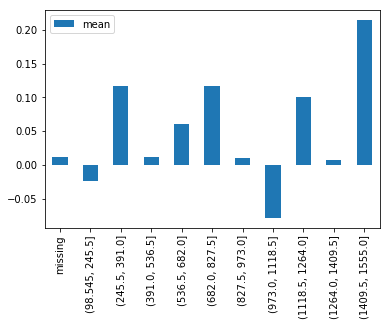

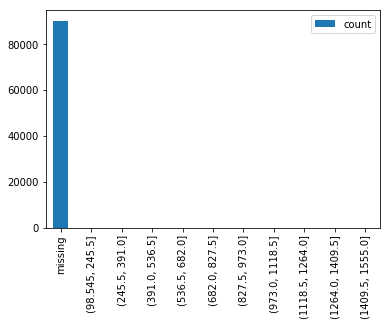

In [23]:
visualize_feature(df_train_2016,'basementsqft','cts',10)

In [24]:
dict_column['Fill_0'].append('basementsqft')

**4) storytypeid**

Type of floors in a multi-story house. 
number of non-missing value : 43 out of 90275  
ratio of missing value :0.999524


It has 43 cells which are not missing and all have the same value of 7. Values range from 1 to 35. Every building has floor , so it should always have the value. Therefore, there is not any meaning for missing values. so I would delete the column

In [25]:
df_train_2016["storytypeid"].unique() 

array([nan,  7.])

             mean
missing  0.011433
7.0      0.062860
           count
missing  90232.0
7.0         43.0
                mean  count     max     min
storytypeid                                
7.0          0.06286     43  0.7669 -0.2549


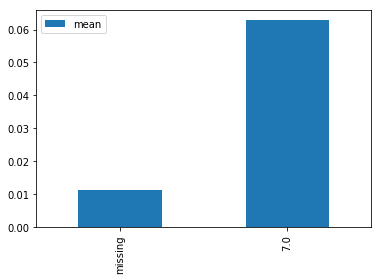

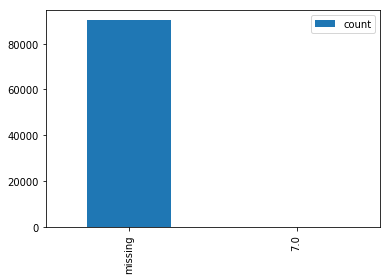

In [26]:
visualize_feature(df_train_2016,'storytypeid')

In [27]:
dict_column['Drop'].append('storytypeid')

**5) yardbuildingsqft26**

Storage shed/building in yard.  
number of non-missing value : 95 out of 90275  
ratio of missing value :0.998948

Missing value might mean that it has no storage in yard. However 99.9 % of houses with no starage in yard is not reasonable. Among 90275 houses, there should be more than 95 houses with storage in yard. I will remove the column. 


In [28]:
df_train_2016["yardbuildingsqft26"].unique() 

array([  nan, 1200.,  126.,  322.,  120.,  235.,  125., 1197.,  204.,
        156.,   62.,   18.,   55.,  168.,   56.,   54.,  100.,   36.,
        110.,  144.,  264.,  180.,  119.,  252.,  477.,  150.,  268.,
        230.,  231.,  308.,   60.,   34.,  136.,  864.,  846.,   88.,
        159., 1366.,   37.,   78.,  642.,  627.,  960., 1000., 1182.,
        400.,  276.,  290.,  943.,  192.,  480.,  288.,  108.,   49.,
        525.,  408.,  133.,   96.,   72.,  504.,  310.,  160.,   41.,
        104.,   33.,   90.,   48., 1050.,  200., 1100.,  240., 1248.,
        648.,  550.])

In [29]:
dict_column['Drop'].append("yardbuildingsqft26")

**6) fireplaceflag**

Is a fireplace present in this home   

number of non-missing value : 222 out of 90275 
ratio of missing value :0.997541

Not all home doesn't have a fireplace present. so fill missing value with False. 

There are only .25% of home with a fireplace.

             mean
missing  0.011448
True     0.015267
           count
missing  90053.0
True       222.0
                   mean  count    max    min
fireplaceflag                               
True           0.015267    222  1.477 -0.417


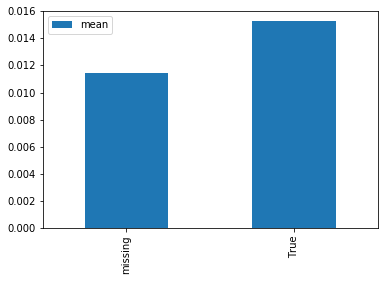

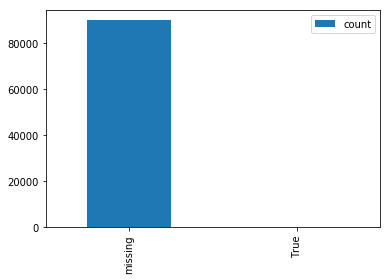

In [30]:
visualize_feature(df_train_2016,'fireplaceflag')

In [31]:
df_train_2016["fireplaceflag"].fillna('False',inplace = True)

**7) architecturalstyletypeid**      

Architectural style of the home (i.e. ranch, colonial, split-level, etc…)  

Number of non-missing value : 261 out of 90275 
Ratio of missing value :0.997109

Every home should have the value for architectural style. It is missing for random and it is 99.7% missing. So delete the column

In [32]:
df_train_2016["architecturalstyletypeid"].unique() 

array([nan,  7.,  8.,  2., 10.,  3., 21.])

             mean
missing  0.011442
2.0      0.012255
3.0      0.046225
7.0      0.016414
8.0      0.015919
10.0     0.063900
21.0     0.014475
           count
missing  90014.0
2.0         11.0
3.0          4.0
7.0        221.0
8.0         16.0
10.0         1.0
21.0         8.0
                              mean  count     max     min
architecturalstyletypeid                                 
2.0                       0.012255     11  0.2086 -0.0747
3.0                       0.046225      4  0.1354 -0.0131
7.0                       0.016414    221  1.4770 -0.4170
8.0                       0.015919     16  0.2829 -0.2182
10.0                      0.063900      1  0.0639  0.0639
21.0                      0.014475      8  0.1115 -0.0834


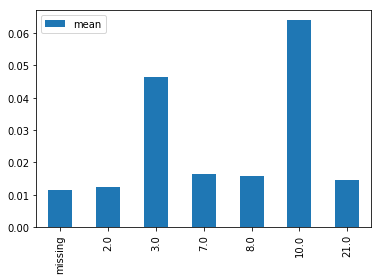

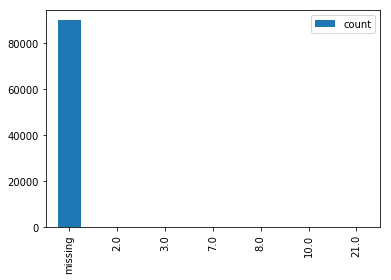

In [33]:
visualize_feature(df_train_2016,'architecturalstyletypeid')

In [34]:
dict_column['Drop'].append("architecturalstyletypeid")

**8) typeconstructiontypeid**      

What type of construction material was used to construct the home  

number of non-missing value : 299 out of 90275
ratio of missing value :0.996688

Every house should have type of construction material. It is missing for random and it is 99.7% missing. so delete the column.

In [35]:
df_train_2016["typeconstructiontypeid"].unique() 

array([nan,  6., 13.,  4.])

             mean
missing  0.011440
4.0      0.043900
6.0      0.016518
13.0    -0.015100
           count
missing  89976.0
4.0          2.0
6.0        296.0
13.0         1.0
                            mean  count     max     min
typeconstructiontypeid                                 
4.0                     0.043900      2  0.0573  0.0305
6.0                     0.016518    296  1.4770 -0.4170
13.0                   -0.015100      1 -0.0151 -0.0151


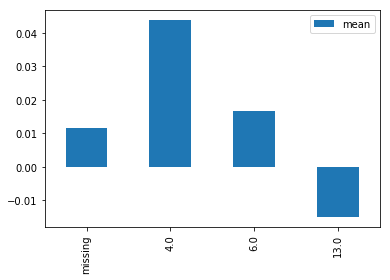

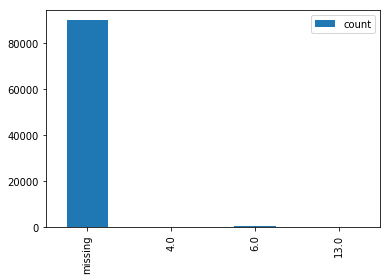

In [36]:
visualize_feature(df_train_2016,'typeconstructiontypeid')

In [37]:
dict_column['Drop'].append("typeconstructiontypeid")

**9) finishedsquarefeet6**     

Base unfinished and finished area  

Number of non-missing value : 421 out of 90275 
Ratio of missing value :0.995336

Every house should have type of construction material. It is missing for random and it is 99.5% missing. so delete the column.

In [38]:
df_train_2016["finishedsquarefeet6"].describe() 

count     421.000000
mean     2302.546318
std      1346.255242
min       257.000000
25%      1112.000000
50%      2028.000000
75%      3431.000000
max      7224.000000
Name: finishedsquarefeet6, dtype: float64

                      mean
missing           0.011608
(250.033, 953.7] -0.031430
(953.7, 1650.4]  -0.026863
(1650.4, 2347.1] -0.014005
(2347.1, 3043.8] -0.038061
(3043.8, 3740.5]  0.016096
(3740.5, 4437.2] -0.054747
(4437.2, 5133.9] -0.003565
(5133.9, 5830.6] -0.083640
(5830.6, 6527.3]  0.433467
(6527.3, 7224.0] -0.084500
                    count
missing           89854.0
(250.033, 953.7]     77.0
(953.7, 1650.4]      89.0
(1650.4, 2347.1]     81.0
(2347.1, 3043.8]     46.0
(3043.8, 3740.5]     52.0
(3740.5, 4437.2]     47.0
(4437.2, 5133.9]     20.0
(5133.9, 5830.6]      5.0
(5830.6, 6527.3]      3.0
(6527.3, 7224.0]      1.0
                         mean  count     max     min
finishedsquarefeet6                                 
(250.033, 953.7]    -0.031430     77  0.6355 -0.7154
(953.7, 1650.4]     -0.026863     89  1.4380 -0.7032
(1650.4, 2347.1]    -0.014005     81  0.4886 -1.0790
(2347.1, 3043.8]    -0.038061     46  1.5070 -0.6675
(3043.8, 3740.5]     0.016096     52  0.8838 -

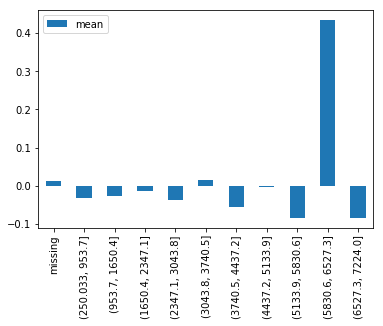

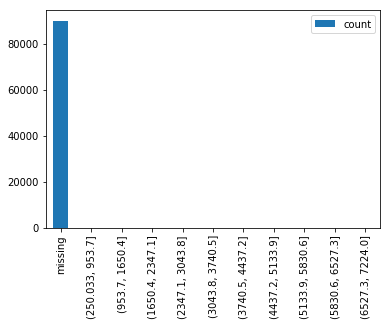

In [39]:
visualize_feature(df_train_2016, "finishedsquarefeet6", "cts", 10 )

In [40]:
dict_column['Drop'].append("finishedsquarefeet6")

**10) 'decktypeid'**     

Type of deck (if any) present on parcel  

Number of non-missing value : 658 out of 90275 
Ratio of missing value :0.992711

Not all home has deck present. However, the cells which do not have missing values have the unique value, 66. Every houses should have the their own unique type of deck. so delete the column as it is missing ramdomly.  

In [41]:
df_train_2016["decktypeid"].unique() 

array([nan, 66.])

             mean
missing  0.011469
66.0     0.009902
           count
missing  89617.0
66.0       658.0
                mean  count    max    min
decktypeid                               
66.0        0.009902    658  1.734 -2.303


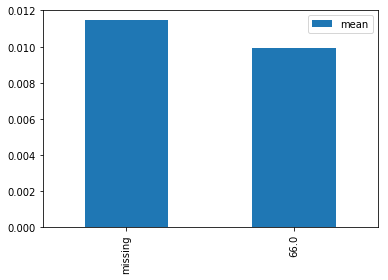

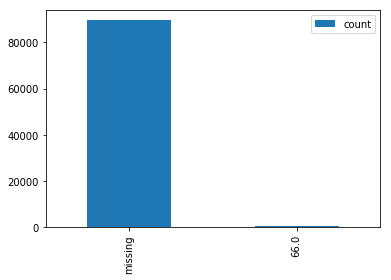

In [42]:
visualize_feature(df_train_2016, "decktypeid")

In [43]:
dict_column['Drop'].append("decktypeid")

**11) 'poolsizesum'**      

Total square footage of all pools on property  

Number of non-missing value : 969 out of 90275 
Ratio of missing value :0.989266

Not all home has pool. So missing value can possibly be home without a pool. The next column "pooltypeid10" which means spa or hot tub has non-missing value of 1161. However column "poolsizesum" which means the size of pool has non-missing value 969. The number of pools which are spa or hot tub,1161, should be less than the number of the size of pool, which is 969 in this case. Therefore, it is missing randomly. Delete the column as it is missing 99%. 

In [44]:
df_train_2016.poolsizesum.describe()

count     969.000000
mean      519.827657
std       155.054210
min        28.000000
25%       420.000000
50%       500.000000
75%       600.000000
max      1750.000000
Name: poolsizesum, dtype: float64

                      mean
missing           0.011490
(26.278, 200.2]   0.010675
(200.2, 372.4]    0.004673
(372.4, 544.6]    0.007620
(544.6, 716.8]    0.011735
(716.8, 889.0]    0.012569
(889.0, 1061.2]   0.005018
(1061.2, 1233.4] -0.139100
(1233.4, 1405.6]       NaN
(1405.6, 1577.8]       NaN
(1577.8, 1750.0] -0.013300
                    count
missing           89306.0
(26.278, 200.2]       8.0
(200.2, 372.4]       96.0
(372.4, 544.6]      532.0
(544.6, 716.8]      228.0
(716.8, 889.0]       90.0
(889.0, 1061.2]      11.0
(1061.2, 1233.4]      2.0
(1233.4, 1405.6]      0.0
(1405.6, 1577.8]      0.0
(1577.8, 1750.0]      2.0
                      mean  count     max     min
poolsizesum                                      
(26.278, 200.2]   0.010675      8  0.1596 -0.1744
(200.2, 372.4]    0.004673     96  0.2784 -0.2510
(372.4, 544.6]    0.007620    532  0.5388 -0.2357
(544.6, 716.8]    0.011735    228  1.1510 -0.5798
(716.8, 889.0]    0.012569     90  0.2484 -0.3813
(889.0, 1061.2

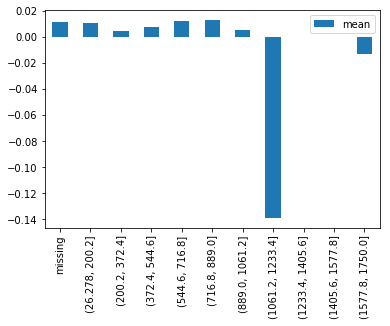

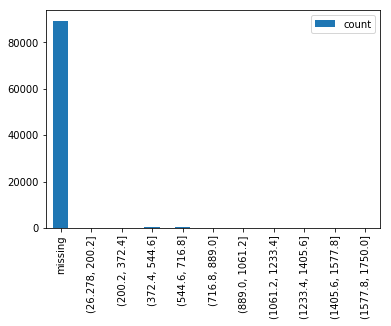

In [45]:
visualize_feature(df_train_2016, "poolsizesum","cts",10)

In [46]:
dict_column['Drop'].append("poolsizesum")

**12) 'pooltypeid10'**      

Spa or Hot Tub  

number of non-missing value : 1161 out of 90275
ratio of missing value :0.987139

Not every home can have pool. Missing values here possibly means home without a pool. However, values are biary, 0 or 1, spa or hot-tub. We can not figure out 0 means home without a pool or missing value. so delete the column



In [47]:
df_train_2016["pooltypeid10"].describe() 

count    1161.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid10, dtype: float64

In [48]:
dict_column['Drop'].append("pooltypeid10")

**13) 'pooltypeid2'**      

Pool with Spa/Hot Tub  

Number of non-missing value : 1204 out of 90275  
Ratio of missing value :0.986663

Delete the column for the same reason as the previous column,pooltypeid10. 

In [49]:
df_train_2016["pooltypeid2"].describe() 

count    1204.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid2, dtype: float64

In [50]:
dict_column['Drop'].append("pooltypeid2")

**14) 'taxdelinquencyflag'**     

Property taxes for this parcel are past due as of 2015  

number of non-missing value : 1783 out of 90275  
ratio of missing value :0.980249

All non-missing values are "Y", therefore missing values are possibly "No" which means property taxes are not past due. So I filled missing value with "N". 

Property taxes are not past due for the majority of houses. 
        

In [51]:
df_train_2016["taxdelinquencyflag"].describe() 

count     1783
unique       1
top          Y
freq      1783
Name: taxdelinquencyflag, dtype: object

             mean
missing  0.011024
Y        0.032945
           count
missing  88492.0
Y         1783.0
                        mean  count    max    min
taxdelinquencyflag                               
Y                   0.032945   1783  1.403 -1.605


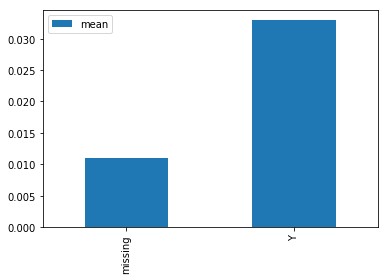

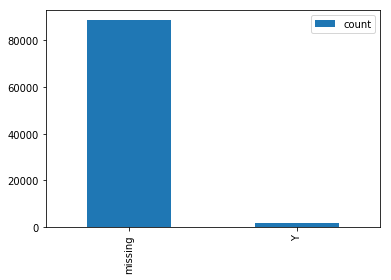

In [52]:
visualize_feature(df_train_2016, "taxdelinquencyflag" )

In [53]:
df_train_2016["taxdelinquencyflag"].fillna('N', inplace =True)
dict_column['Categorical'].append("taxdelinquencyflag")

**15) 'taxdelinquencyyear'**     

Year for which the unpaid propert taxes were due   

number of non-missing value : 1783 out of 90275  
ratio of missing value :0.980249

The column'taxdelinquencyyear' is related to the previous column 'taxdelinquencyflag' which represents whether Property taxes for this parcel are past due or not and the missing values are 1783 for for both columns. Therefore it is not missing radomly.  Therefore fill missing values with 0

There is one outlier which is 99 and other values are all less than 16. The cell with 99 might mean the home have not paid property tax for a long time. It has high logerror , 0.453000.

Let's visualize the date which is less than 15.


In [54]:
df_train_2016["taxdelinquencyyear"].describe() 

count    1783.000000
mean       13.402692
std         2.715966
min         6.000000
25%        13.000000
50%        14.000000
75%        15.000000
max        99.000000
Name: taxdelinquencyyear, dtype: float64

                   mean
missing        0.011024
(5.907, 15.3]  0.032709
(15.3, 24.6]        NaN
(24.6, 33.9]        NaN
(33.9, 43.2]        NaN
(43.2, 52.5]        NaN
(52.5, 61.8]        NaN
(61.8, 71.1]        NaN
(71.1, 80.4]        NaN
(80.4, 89.7]        NaN
(89.7, 99.0]   0.453000
                 count
missing        88492.0
(5.907, 15.3]   1782.0
(15.3, 24.6]       0.0
(24.6, 33.9]       0.0
(33.9, 43.2]       0.0
(43.2, 52.5]       0.0
(52.5, 61.8]       0.0
(61.8, 71.1]       0.0
(71.1, 80.4]       0.0
(80.4, 89.7]       0.0
(89.7, 99.0]       1.0
                        mean  count    max    min
taxdelinquencyyear                               
(5.907, 15.3]       0.032709   1782  1.403 -1.605
(15.3, 24.6]             NaN      0    NaN    NaN
(24.6, 33.9]             NaN      0    NaN    NaN
(33.9, 43.2]             NaN      0    NaN    NaN
(43.2, 52.5]             NaN      0    NaN    NaN
(52.5, 61.8]             NaN      0    NaN    NaN
(61.8, 71.1]             NaN      0 

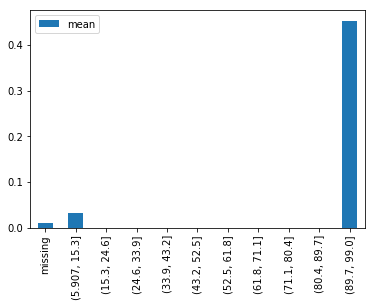

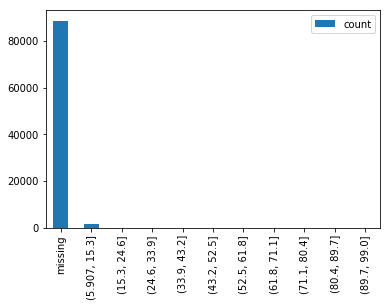

In [55]:
visualize_feature(df_train_2016, "taxdelinquencyyear", "cts", 10 )

In [56]:
df_train_2016[df_train_2016["taxdelinquencyyear"]==99].transpose()

,67993
parcelid,12647809
logerror,0.453
transactiondate,2016-08-19 00:00:00
airconditioningtypeid,NaN
architecturalstyletypeid,NaN
basementsqft,NaN
bathroomcnt,1
bedroomcnt,2
buildingclasstypeid,NaN
buildingqualitytypeid,7


                  mean
missing            NaN
(5.991, 6.9]  0.011167
(6.9, 7.8]    0.015187
(7.8, 8.7]    0.117717
(8.7, 9.6]    0.083190
(9.6, 10.5]   0.048737
(10.5, 11.4]  0.051198
(11.4, 12.3]  0.051968
(12.3, 13.2]  0.028111
(13.2, 14.1]  0.026696
(14.1, 15.0]  0.020667
              count
missing         0.0
(5.991, 6.9]    3.0
(6.9, 7.8]      8.0
(7.8, 8.7]     24.0
(8.7, 9.6]     63.0
(9.6, 10.5]    89.0
(10.5, 11.4]   85.0
(11.4, 12.3]  154.0
(12.3, 13.2]  210.0
(13.2, 14.1]  628.0
(14.1, 15.0]  518.0
                        mean  count     max     min
taxdelinquencyyear                                 
(5.991, 6.9]        0.011167      3  0.2311 -0.3313
(6.9, 7.8]          0.015187      8  0.2311 -0.0587
(7.8, 8.7]          0.117717     24  0.5883 -0.0866
(8.7, 9.6]          0.083190     63  1.1340 -0.3567
(9.6, 10.5]         0.048737     89  1.4030 -1.6050
(10.5, 11.4]        0.051198     85  0.9685 -0.3930
(11.4, 12.3]        0.051968    154  1.1690 -0.4829
(12.3, 13.2]    

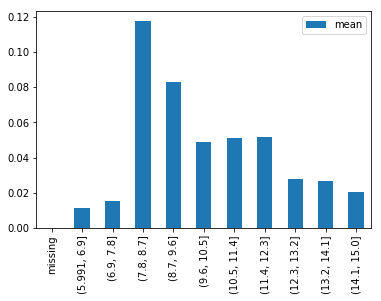

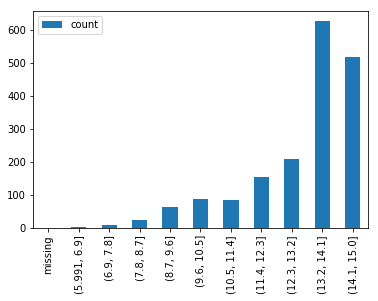

In [57]:
visualize_feature(df_train_2016[df_train_2016.taxdelinquencyyear < 16], "taxdelinquencyyear", "cts", 10 )

In [58]:
dict_column['Fill_0'].append("taxdelinquencyyear")

**16) 'hashottuborspa'**      

Does the home have a hot tub or spa  

number of non-missing value : 2365  
ratio of missing value :0.973802

Values which are not all "True", therefore missing values are possibly "False" which means property taxes are not past due. So I filled missing value with "False"

In [59]:
df_train_2016["hashottuborspa"].describe() 

count     2365
unique       1
top       True
freq      2365
Name: hashottuborspa, dtype: object

In [60]:
dict_column['Fill_0'].append("yardbuildingsqft17")

**18) 'finishedsquarefeet15'**     

Total area  

number of missing value : 3564  
ratio of missing value :0.960521

Every place should have total area, so they are missing randomly. Value are missing for 96% so delete the column. 

In [61]:
df_train_2016["finishedsquarefeet15"].describe() 

count     3564.000000
mean      2380.090067
std       1068.207182
min        560.000000
25%       1648.000000
50%       2104.500000
75%       2862.000000
max      22741.000000
Name: finishedsquarefeet15, dtype: float64

                        mean
missing             0.011542
(537.819, 2778.1]   0.008719
(2778.1, 4996.2]    0.007630
(4996.2, 7214.3]    0.033382
(7214.3, 9432.4]    0.303880
(9432.4, 11650.5]        NaN
(11650.5, 13868.6]       NaN
(13868.6, 16086.7]       NaN
(16086.7, 18304.8]       NaN
(18304.8, 20522.9]       NaN
(20522.9, 22741.0] -0.019200
                      count
missing             86711.0
(537.819, 2778.1]    2610.0
(2778.1, 4996.2]      872.0
(4996.2, 7214.3]       76.0
(7214.3, 9432.4]        5.0
(9432.4, 11650.5]       0.0
(11650.5, 13868.6]      0.0
(13868.6, 16086.7]      0.0
(16086.7, 18304.8]      0.0
(18304.8, 20522.9]      0.0
(20522.9, 22741.0]      1.0
                          mean  count     max     min
finishedsquarefeet15                                 
(537.819, 2778.1]     0.008719   2610  2.9260 -1.6770
(2778.1, 4996.2]      0.007630    872  3.1150 -2.6880
(4996.2, 7214.3]      0.033382     76  1.5470 -1.2040
(7214.3, 9432.4]      0.303880      5  0.5636 

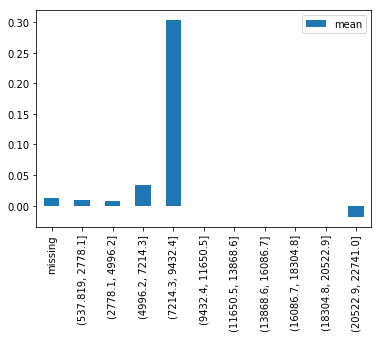

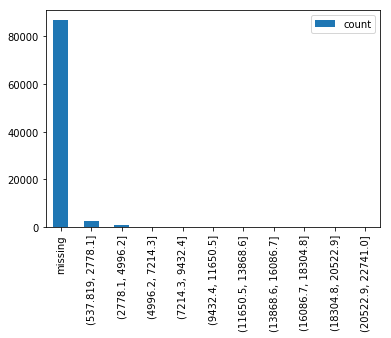

In [62]:
visualize_feature(df_train_2016, "finishedsquarefeet15", "cts", 10 )

In [63]:
dict_column['Drop'].append("finishedsquarefeet15")

**19) 'finishedfloor1squarefeet'**      

Size of the finished living area on the first (entry) floor of the home  

number of missing value : 6856  
ratio of missing value :0.924054

Most home has living room area on the first floor. Ratio of missing values is 92%. so delete the column.



In [64]:
df_train_2016["finishedfloor1squarefeet"].describe() 

count    6856.000000
mean     1347.974037
std       652.399026
min        44.000000
25%       938.000000
50%      1244.000000
75%      1614.000000
max      7625.000000
Name: finishedfloor1squarefeet, dtype: float64

                      mean
missing           0.010970
(36.419, 802.1]   0.016071
(802.1, 1560.2]   0.015666
(1560.2, 2318.3]  0.020323
(2318.3, 3076.4]  0.016188
(3076.4, 3834.5]  0.021884
(3834.5, 4592.6]  0.044864
(4592.6, 5350.7]  0.219267
(5350.7, 6108.8]  0.124850
(6108.8, 6866.9] -0.060675
(6866.9, 7625.0]  0.127550
                    count
missing           83419.0
(36.419, 802.1]    1129.0
(802.1, 1560.2]    3810.0
(1560.2, 2318.3]   1473.0
(2318.3, 3076.4]    288.0
(3076.4, 3834.5]     97.0
(3834.5, 4592.6]     39.0
(4592.6, 5350.7]     12.0
(5350.7, 6108.8]      2.0
(6108.8, 6866.9]      4.0
(6866.9, 7625.0]      2.0
                              mean  count     max     min
finishedfloor1squarefeet                                 
(36.419, 802.1]           0.016071   1129  1.0380 -2.3030
(802.1, 1560.2]           0.015666   3810  2.3050 -4.6050
(1560.2, 2318.3]          0.020323   1473  3.0180 -0.5960
(2318.3, 3076.4]          0.016188    288  1.0160 -0.4780
(3076.4, 3834.5]

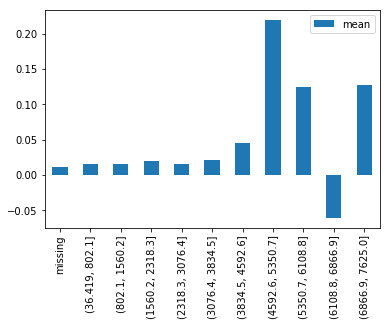

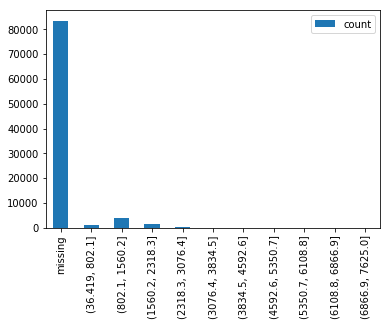

In [65]:
visualize_feature(df_train_2016, "finishedfloor1squarefeet", "cts",10  )

In [66]:
dict_column['Drop'].append("finishedfloor1squarefeet")

**20) 'finishedsquarefeet50'**      

Size of the finished living area on the first (entry) floor of the home  

number of non-missing value : 6856 out of 90275 
ratio of missing value :0.924054

The column "finishedsquarefeet50" is the repeat of the previous column "finishedfloor1squarefeet". Delete the column. 

In [67]:
df_train_2016["finishedsquarefeet50"].describe() 

count    6856.000000
mean     1355.546674
std       673.703488
min        44.000000
25%       938.000000
50%      1248.000000
75%      1619.000000
max      8352.000000
Name: finishedsquarefeet50, dtype: float64

                      mean
missing           0.010970
(35.692, 874.8]   0.015809
(874.8, 1705.6]   0.017429
(1705.6, 2536.4]  0.014608
(2536.4, 3367.2]  0.024533
(3367.2, 4198.0]  0.032536
(4198.0, 5028.8]  0.123815
(5028.8, 5859.6]  0.028463
(5859.6, 6690.4] -0.114175
(6690.4, 7521.2] -0.090700
(7521.2, 8352.0]  0.212600
                    count
missing           83419.0
(35.692, 874.8]    1448.0
(874.8, 1705.6]    3985.0
(1705.6, 2536.4]   1100.0
(2536.4, 3367.2]    207.0
(3367.2, 4198.0]     72.0
(4198.0, 5028.8]     26.0
(5028.8, 5859.6]      8.0
(5859.6, 6690.4]      4.0
(6690.4, 7521.2]      3.0
(7521.2, 8352.0]      3.0
                          mean  count     max     min
finishedsquarefeet50                                 
(35.692, 874.8]       0.015809   1448  1.0380 -2.3030
(874.8, 1705.6]       0.017429   3985  2.4890 -4.6050
(1705.6, 2536.4]      0.014608   1100  3.0180 -0.7052
(2536.4, 3367.2]      0.024533    207  1.0160 -0.3230
(3367.2, 4198.0]      0.032536     72  0

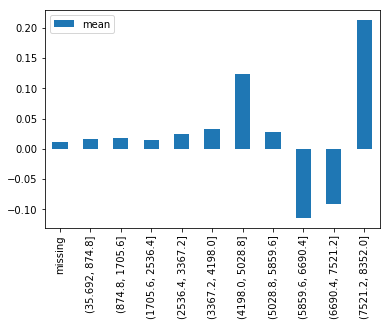

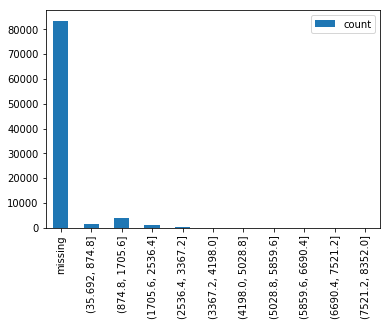

In [68]:
visualize_feature(df_train_2016, "finishedsquarefeet50", "cts", 10 )

In [69]:
dict_column['Drop'].append("finishedsquarefeet50")

**21) 'fireplacecnt'**      

Number of fireplaces in a home (if any)  
number of missing value : 9607  
ratio of missing value :0.893581

Not every home has fireplace. so fill missing values with 0. 



In [70]:
df_train_2016["fireplacecnt"].describe() 

count    9607.000000
mean        1.187884
std         0.484173
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fireplacecnt, dtype: float64

                  mean
missing       0.011220
(0.996, 1.4]  0.011630
(1.4, 1.8]         NaN
(1.8, 2.2]    0.021573
(2.2, 2.6]         NaN
(2.6, 3.0]    0.028155
(3.0, 3.4]         NaN
(3.4, 3.8]         NaN
(3.8, 4.2]    0.060257
(4.2, 4.6]         NaN
(4.6, 5.0]    0.106000
                count
missing       80668.0
(0.996, 1.4]   8165.0
(1.4, 1.8]        0.0
(1.8, 2.2]     1106.0
(2.2, 2.6]        0.0
(2.6, 3.0]      312.0
(3.0, 3.4]        0.0
(3.4, 3.8]        0.0
(3.8, 4.2]       21.0
(4.2, 4.6]        0.0
(4.6, 5.0]        3.0
                  mean  count     max     min
fireplacecnt                                 
(0.996, 1.4]  0.011630   8165  3.2890 -4.6050
(1.4, 1.8]         NaN      0     NaN     NaN
(1.8, 2.2]    0.021573   1106  1.8470 -0.5586
(2.2, 2.6]         NaN      0     NaN     NaN
(2.6, 3.0]    0.028155    312  3.0180 -0.5960
(3.0, 3.4]         NaN      0     NaN     NaN
(3.4, 3.8]         NaN      0     NaN     NaN
(3.8, 4.2]    0.060257     21  0.2852 -0.3230


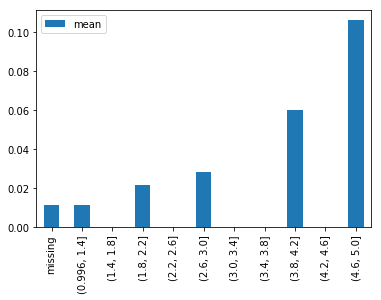

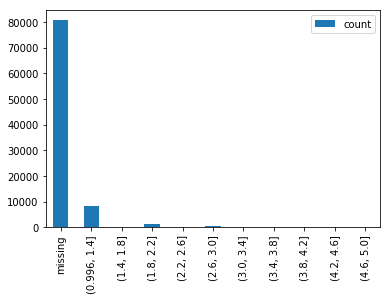

In [71]:
visualize_feature(df_train_2016, "fireplacecnt", "cts", 10 )

In [72]:
dict_column['Fill_0'].append("fireplacecnt")

**22) 'threequarterbathnbr'**      

Number of 3/4 bathrooms in house (shower + sink + toilet)  

number of non-missing value : 12009  
ratio of missing value :0.866973

Not all home has 3/4 bathrooms. so fill missing values with 0. 

In [73]:
df_train_2016["threequarterbathnbr"].describe() 

count    12009.000000
mean         1.008743
std          0.100830
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: threequarterbathnbr, dtype: float64

                  mean
missing       0.011181
(0.997, 1.3]  0.012815
(1.3, 1.6]         NaN
(1.6, 1.9]         NaN
(1.9, 2.2]    0.068297
(2.2, 2.5]         NaN
(2.5, 2.8]         NaN
(2.8, 3.1]    0.035783
(3.1, 3.4]         NaN
(3.4, 3.7]         NaN
(3.7, 4.0]    0.178100
                count
missing       78266.0
(0.997, 1.3]  11912.0
(1.3, 1.6]        0.0
(1.6, 1.9]        0.0
(1.9, 2.2]       90.0
(2.2, 2.5]        0.0
(2.5, 2.8]        0.0
(2.8, 3.1]        6.0
(3.1, 3.4]        0.0
(3.4, 3.7]        0.0
(3.7, 4.0]        1.0
                         mean  count     max     min
threequarterbathnbr                                 
(0.997, 1.3]         0.012815  11912  3.0180 -4.6050
(1.3, 1.6]                NaN      0     NaN     NaN
(1.6, 1.9]                NaN      0     NaN     NaN
(1.9, 2.2]           0.068297     90  3.2890 -0.6330
(2.2, 2.5]                NaN      0     NaN     NaN
(2.5, 2.8]                NaN      0     NaN     NaN
(2.8, 3.1]           0.035783      6

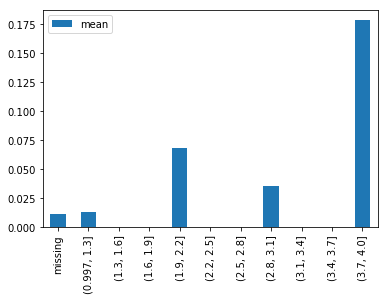

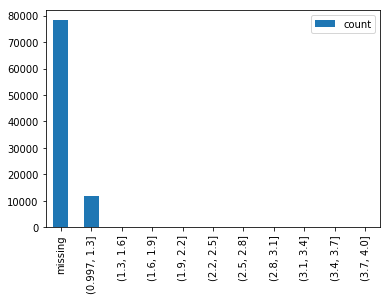

In [74]:
visualize_feature(df_train_2016, "threequarterbathnbr", "cts", 10 )

In [75]:
dict_column['Fill_0'].append("threequarterbathnbr")

**23) 'pooltypeid7'**      

Pool without hot tub  

number of non- missing value : 16697 out of 90275 
ratio of missing value :0.815043

Not all home has a pool, However, we cannot figure out what missing value means, whether home without a pool or pool without hot tub. so delete the column

In [76]:
df_train_2016["pooltypeid7"].describe() 

count    16697.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: pooltypeid7, dtype: float64

             mean
missing  0.012077
1.0      0.008726
           count
missing  73578.0
1.0      16697.0
                 mean  count    max    min
pooltypeid7                               
1.0          0.008726  16697  3.968 -4.605


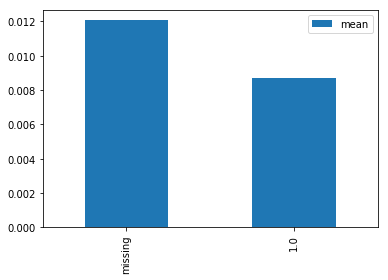

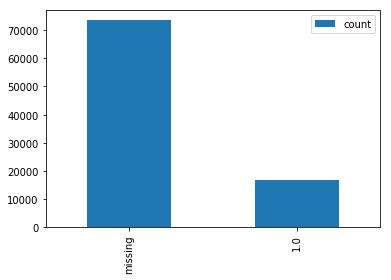

In [77]:
visualize_feature(df_train_2016, "pooltypeid7" )

In [78]:
dict_column['Drop'].append("pooltypeid7")

**24) 'poolcnt'**      

Number of pools on the lot (if any)  

number of non-missing value : 17901 out of 90275 
ratio of missing value :0.801706

Missing value can mean home with no pool. so fill missing values with 0. 

In [79]:
df_train_2016["poolcnt"].describe() 

count    17901.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: poolcnt, dtype: float64

             mean
missing  0.012177
1.0      0.008548
           count
missing  72374.0
1.0      17901.0
             mean  count    max    min
poolcnt                               
1.0      0.008548  17901  3.968 -4.605


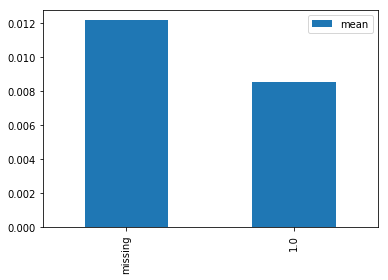

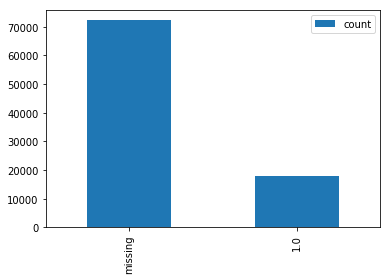

In [80]:
visualize_feature(df_train_2016, "poolcnt" )

In [81]:
dict_column['Fill_0'].append("poolcnt")

**25) 'numberofstories'**      

Number of stories or levels the home has  

number of missing value : 20570 out of 90275
ratio of non-missing value :0.772141

Every home has at least 1 level. Therefore it is missing randomly. so delete the column. 

In [82]:
df_train_2016["numberofstories"].describe() 

count    20570.000000
mean         1.440739
std          0.544498
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: numberofstories, dtype: float64

             mean
missing  0.011208
1.0      0.010724
2.0      0.014252
3.0      0.018598
4.0      0.052100
           count
missing  69705.0
1.0      12016.0
2.0       8044.0
3.0        508.0
4.0          2.0
                     mean  count     max    min
numberofstories                                
1.0              0.010724  12016  3.2890 -2.976
2.0              0.014252   8044  3.0180 -4.605
3.0              0.018598    508  1.2190 -2.207
4.0              0.052100      2  0.1062 -0.002


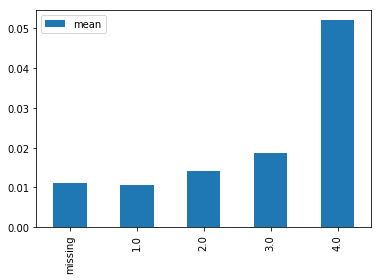

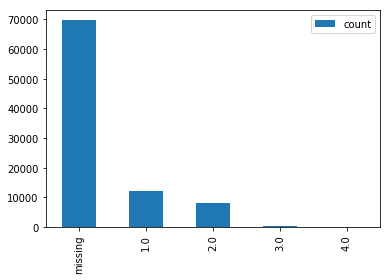

In [83]:
visualize_feature(df_train_2016, "numberofstories" )

In [84]:
dict_column['Drop'].append("numberofstories")

**26) 'airconditioningtypeid'**      

Type of cooling system present in the home (if any)  

number of missing value : 28781  
ratio of missing value :0.681185

Not all home can have a colling system. so fill missing values with 0. 

In [85]:
df_train_2016["airconditioningtypeid"].describe() 

count    28781.000000
mean         1.816372
std          2.974168
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: airconditioningtypeid, dtype: float64

             mean
missing  0.010701
1.0      0.012852
3.0      0.091700
5.0      0.015682
9.0      0.010000
11.0     0.026294
13.0     0.015466
           count
missing  61494.0
1.0      26668.0
3.0          1.0
5.0        215.0
9.0          1.0
11.0        63.0
13.0      1833.0
                           mean  count     max     min
airconditioningtypeid                                 
1.0                    0.012852  26668  4.7370 -3.1940
3.0                    0.091700      1  0.0917  0.0917
5.0                    0.015682    215  1.2210 -0.2370
9.0                    0.010000      1  0.0100  0.0100
11.0                   0.026294     63  0.2111 -0.0987
13.0                   0.015466   1833  3.2890 -2.6880


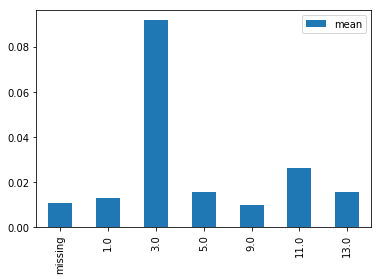

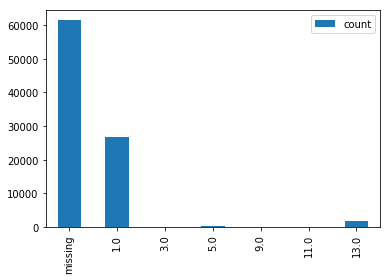

In [86]:
visualize_feature(df_train_2016, "airconditioningtypeid" )

In [87]:
dict_column['Fill_0'].append("airconditioningtypeid")
dict_column['Categorical'].append("airconditioningtypeid")

**27) 'garagetotalsqft'**      

Total number of square feet of all garages on lot including an attached garage  

number of non-missing value : 29937  
ratio of missing value :0.66838

Delete the column for the same reasong wit the next column "garagecarcnt". 

In [88]:
df_train_2016["garagetotalsqft"].describe() 

count    29937.000000
mean       345.521228
std        267.015918
min          0.000000
25%          0.000000
50%        433.000000
75%        484.000000
max       7339.000000
Name: garagetotalsqft, dtype: float64

                      mean
missing           0.011298
(-7.339, 733.9]   0.011190
(733.9, 1467.8]   0.034468
(1467.8, 2201.7]  0.005641
(2201.7, 2935.6] -0.059723
(2935.6, 3669.5]  0.082000
(3669.5, 4403.4]  0.171800
(4403.4, 5137.3]       NaN
(5137.3, 5871.2]       NaN
(5871.2, 6605.1]       NaN
(6605.1, 7339.0] -0.478000
                    count
missing           60338.0
(-7.339, 733.9]   29087.0
(733.9, 1467.8]     798.0
(1467.8, 2201.7]     32.0
(2201.7, 2935.6]     13.0
(2935.6, 3669.5]      4.0
(3669.5, 4403.4]      2.0
(4403.4, 5137.3]      0.0
(5137.3, 5871.2]      0.0
(5871.2, 6605.1]      0.0
(6605.1, 7339.0]      1.0
                      mean  count     max     min
garagetotalsqft                                  
(-7.339, 733.9]   0.011190  29087  3.0180 -4.6050
(733.9, 1467.8]   0.034468    798  3.2890 -0.6892
(1467.8, 2201.7]  0.005641     32  0.2151 -0.6539
(2201.7, 2935.6] -0.059723     13  0.1510 -0.5192
(2935.6, 3669.5]  0.082000      4  0.2949 -0.2033
(3669.5, 4403.

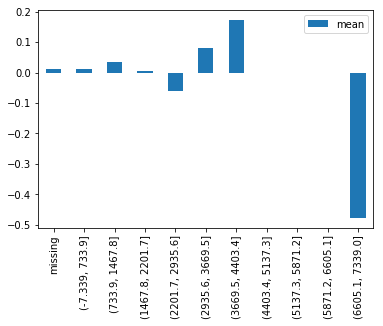

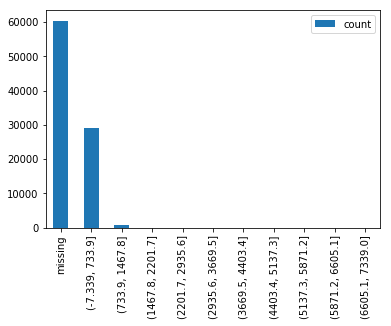

In [89]:
visualize_feature(df_train_2016, "garagetotalsqft", "cts", 10 )

In [90]:
dict_column['Drop'].append("garagetotalsqft")

**28) 'garagecarcnt'**      

Total number of garages on the lot including an attached garage  

number of missing value : 29937  
ratio of missing value :0.66838

Not every home has a garage. So we might fill missing value with 0 which means home without a garage. However, 290 cells have value of 0 . It means that not every home without a garage has missing value. So it is missing for random. so delete the column. 

In [91]:
df_train_2016["garagecarcnt"].describe() 

count    29937.000000
mean         1.812005
std          0.608761
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         24.000000
Name: garagecarcnt, dtype: float64

In [92]:
df_train_2016[df_train_2016["garagecarcnt"]==0]["garagecarcnt"].value_counts()

0.0    290
Name: garagecarcnt, dtype: int64

                   mean
missing        0.011298
(-0.024, 2.4]  0.011003
(2.4, 4.8]     0.033278
(4.8, 7.2]     0.052909
(7.2, 9.6]    -0.059723
(9.6, 12.0]    0.082000
(12.0, 14.4]   0.171800
(14.4, 16.8]        NaN
(16.8, 19.2]        NaN
(19.2, 21.6]        NaN
(21.6, 24.0]  -0.478000
                 count
missing        60338.0
(-0.024, 2.4]  28911.0
(2.4, 4.8]       925.0
(4.8, 7.2]        81.0
(7.2, 9.6]        13.0
(9.6, 12.0]        4.0
(12.0, 14.4]       2.0
(14.4, 16.8]       0.0
(16.8, 19.2]       0.0
(19.2, 21.6]       0.0
(21.6, 24.0]       1.0
                   mean  count     max     min
garagecarcnt                                  
(-0.024, 2.4]  0.011003  28911  3.0180 -4.6050
(2.4, 4.8]     0.033278    925  3.2890 -0.6892
(4.8, 7.2]     0.052909     81  1.7810 -0.6539
(7.2, 9.6]    -0.059723     13  0.1510 -0.5192
(9.6, 12.0]    0.082000      4  0.2949 -0.2033
(12.0, 14.4]   0.171800      2  0.4898 -0.1462
(14.4, 16.8]        NaN      0     NaN     NaN
(16.8, 19.2] 

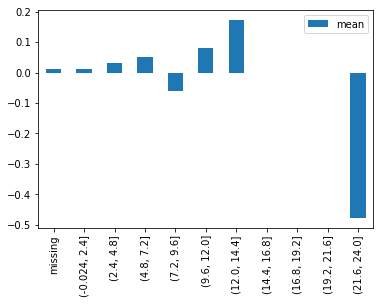

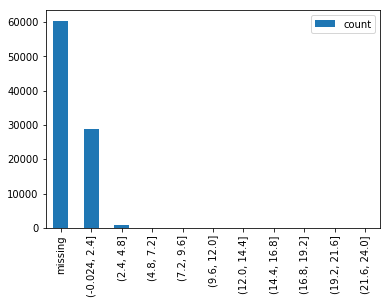

In [93]:
visualize_feature(df_train_2016, "garagecarcnt", "cts", 10 )

In [94]:
dict_column['Drop'].append("garagecarcnt")

**29) 'regionidneighborhood'**     

Neighborhood in which the property is located  

number of missing value : 36012  
ratio of missing value :0.601086

From the graph below, we can see that it is missing randomly. So delete the column. 

In [95]:
df_train_2016["regionidneighborhood"].describe() 

count     36012.000000
mean     190646.540237
std      166228.910572
min        6952.000000
25%       46736.000000
50%      118887.000000
75%      274800.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64

                          mean
missing               0.012266
(6194.785, 82673.5]   0.011667
(82673.5, 158395.0]   0.010146
(158395.0, 234116.5] -0.007008
(234116.5, 309838.0]  0.009461
(309838.0, 385559.5]  0.066699
(385559.5, 461281.0]  0.007180
(461281.0, 537002.5]       NaN
(537002.5, 612724.0]       NaN
(612724.0, 688445.5] -0.052934
(688445.5, 764167.0]  0.012605
                        count
missing               54263.0
(6194.785, 82673.5]   13079.0
(82673.5, 158395.0]    5434.0
(158395.0, 234116.5]     65.0
(234116.5, 309838.0]  13678.0
(309838.0, 385559.5]     68.0
(385559.5, 461281.0]   2291.0
(461281.0, 537002.5]      0.0
(537002.5, 612724.0]      0.0
(612724.0, 688445.5]    100.0
(688445.5, 764167.0]   1297.0
                          mean  count     max     min
regionidneighborhood                                 
(6194.785, 82673.5]   0.011667  13079  3.9680 -3.1940
(82673.5, 158395.0]   0.010146   5434  4.7370 -4.5100
(158395.0, 234116.5] -0.007008     65  0.1714 -0.408

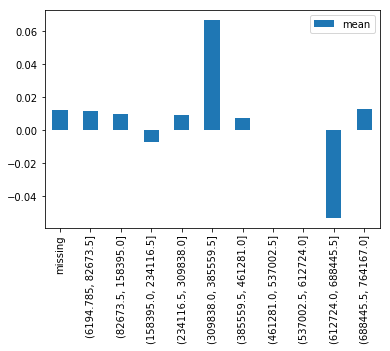

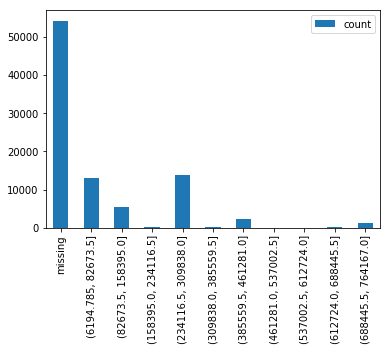

In [96]:
visualize_feature(df_train_2016, "regionidneighborhood", "cts", 10 )

In [97]:
dict_column['Drop'].append("regionidneighborhood")

**30) 'heatingorsystemtypeid'**      

Type of home heating system  

number of non-missing value : 56080 out of 90275  
ratio of missing value :0.378787

There is certainly no law that prohibits selling a home with no heater in California. Therefore missing value possibly means home without heating system. so filled missing values with 0. 

In [98]:
df_train_2016["heatingorsystemtypeid"].describe() 

count    56080.000000
mean         3.926979
std          3.684382
min          1.000000
25%          2.000000
50%          2.000000
75%          7.000000
max         24.000000
Name: heatingorsystemtypeid, dtype: float64

             mean
missing  0.012052
1.0      0.024577
2.0      0.013245
6.0      0.009798
7.0      0.007492
10.0    -0.029300
11.0    -0.015100
12.0    -0.013100
13.0    -0.000012
14.0    -0.004900
18.0     0.027436
20.0    -0.000681
24.0    -0.010977
           count
missing  34195.0
1.0         13.0
2.0      38303.0
6.0        970.0
7.0      15519.0
10.0         2.0
11.0         1.0
12.0         1.0
13.0        76.0
14.0         2.0
18.0        25.0
20.0        97.0
24.0      1071.0
                           mean  count     max     min
heatingorsystemtypeid                                 
1.0                    0.024577     13  0.1604 -0.0726
2.0                    0.013245  38303  4.7370 -3.1940
6.0                    0.009798    970  1.4770 -0.5192
7.0                    0.007492  15519  3.4430 -4.6050
10.0                  -0.029300      2 -0.0020 -0.0566
11.0                  -0.015100      1 -0.0151 -0.0151
12.0                  -0.013100      1 -0.0131 -0.0131
13.0           

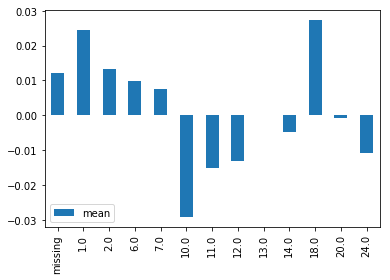

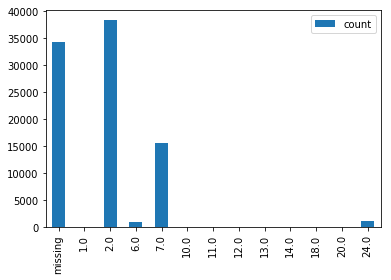

In [99]:
visualize_feature(df_train_2016, "heatingorsystemtypeid" )

In [100]:
dict_column['Fill_0'].append("heatingorsystemtypeid")
dict_column['Categorical'].append("heatingorsystemtypeid")

**31) 'buildingqualitytypeid'**      

Overall assessment of condition of the building from best (lowest) to worst (highest)  

number of non-missing value : 57364 out of 90275  
ratio of missing value :0.364564

Every home can have overall assessment of condition of the building. Therefore, fill missing values with mean 

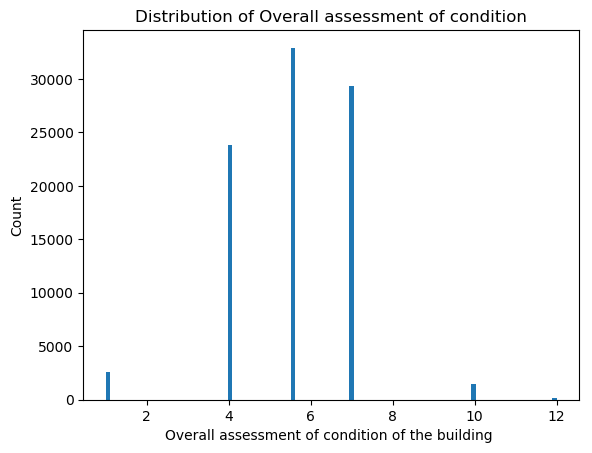

In [293]:
plt.hist((df_train_2016.buildingqualitytypeid.dropna()),100)
plt.title("Distribution of Overall assessment of condition")
plt.xlabel("Overall assessment of condition of the building ")
plt.ylabel("Count")
plt.show()

In [299]:
df_train_2016["buildingqualitytypeid"].describe() 

count    90275.000000
mean         5.565407
std          1.515046
min          1.000000
25%          4.000000
50%          5.565407
75%          7.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64

                  mean
missing       0.011849
(0.989, 2.1]  0.013547
(2.1, 3.2]         NaN
(3.2, 4.3]    0.013469
(4.3, 5.4]         NaN
(5.4, 6.5]    0.063650
(6.5, 7.6]    0.008872
(7.6, 8.7]    0.406700
(8.7, 9.8]         NaN
(9.8, 10.9]   0.017232
(10.9, 12.0]  0.002373
                count
missing       32911.0
(0.989, 2.1]   2627.0
(2.1, 3.2]        0.0
(3.2, 4.3]    23839.0
(4.3, 5.4]        0.0
(5.4, 6.5]        2.0
(6.5, 7.6]    29310.0
(7.6, 8.7]        5.0
(8.7, 9.8]        0.0
(9.8, 10.9]    1461.0
(10.9, 12.0]    120.0
                           mean  count     max     min
buildingqualitytypeid                                 
(0.989, 2.1]           0.013547   2627  3.4030 -1.7090
(2.1, 3.2]                  NaN      0     NaN     NaN
(3.2, 4.3]             0.013469  23839  4.5200 -3.1940
(4.3, 5.4]                  NaN      0     NaN     NaN
(5.4, 6.5]             0.063650      2  0.1765 -0.0492
(6.5, 7.6]             0.008872  29310  3.4430 -4.6050
(7.6, 8.7]          

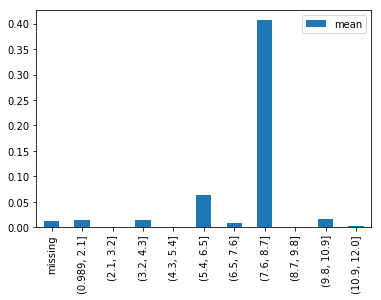

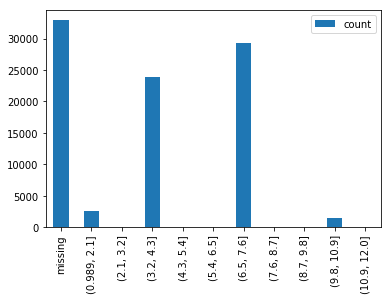

In [102]:
visualize_feature(df_train_2016, "buildingqualitytypeid", "cts",10  )

In [103]:
dict_column['Fill_mean'].append("buildingqualitytypeid")

**32) 'propertyzoningdesc'**      

Description of the allowed land uses (zoning) for that property  

number of non-missing value : 58313 out of 90275 
ratio of missing value :0.354052

There are 7678 unique values. The most frequent value is "LAR1" and has frequency of 7678, 8.5%. We would use values with more than 1%. Other values with less than 1% is too small. We would label values with less than 1% to "Others" and remain missing values.   


In [104]:
df_train_2016["propertyzoningdesc"].describe() 

count     58313
unique     1996
top        LAR1
freq       7678
Name: propertyzoningdesc, dtype: object

In [105]:
df_train_2016["propertyzoningdesc"].value_counts() /90275

LAR1          0.085051
LAR3          0.031027
LARS          0.016649
LBR1N         0.016162
LARD1.5       0.014456
LAR2          0.014256
SCUR2         0.012229
LARD2         0.010667
LARA          0.009427
LARE11        0.007931
LARE15        0.006835
TORR-LO       0.006824
LCR1YY        0.005871
LAR4          0.005594
SCUR3         0.005450
PSR6          0.004885
LARD3         0.004730
LKR1YY        0.004442
GLR1YY        0.003733
PDR1*         0.003633
LCA11*        0.003600
LCR1*         0.003445
LAC2          0.003390
LCA22*        0.003390
LCA25*        0.003190
BUR1YY        0.003135
LCA106        0.003079
LCA21*        0.003079
CORL*         0.002935
LBR2N         0.002935
                ...   
RA15000-LC    0.000011
CCR3A*        0.000011
RPRAIA*       0.000011
LCR3-R1200    0.000011
LCA22-A25*    0.000011
NOR14500*     0.000011
LCRA81/2      0.000011
COCM*         0.000011
LORVD12OO*    0.000011
LCA11-R110    0.000011
LCRA20000     0.000011
CV17500-RD    0.000011
LR-R10000  

In [106]:
def mod_categorical(var, percent):
    missing_rate = df_train_2016[var].value_counts()/len(df_train_2016[var])
    check = missing_rate[missing_rate >= 0.01].keys()
    df_train_2016.loc[~df_train_2016[var].isin(check) ,[var]] = "Others"
    

mod_categorical("propertyzoningdesc",0.01)

             mean
missing       NaN
LAR1     0.007709
LAR2    -0.011193
LAR3     0.014480
LARD1.5  0.004401
LARD2    0.009940
LARS     0.011694
LBR1N    0.008054
Others   0.012378
SCUR2    0.009934
           count
missing      0.0
LAR1      7678.0
LAR2      1287.0
LAR3      2801.0
LARD1.5   1305.0
LARD2      963.0
LARS      1503.0
LBR1N     1459.0
Others   72175.0
SCUR2     1104.0
                        mean  count    max     min
propertyzoningdesc                                
LAR1                0.007709   7678  2.758 -4.5100
LAR2               -0.011193   1287  3.115 -1.4570
LAR3                0.014480   2801  2.953 -3.1940
LARD1.5             0.004401   1305  2.052 -2.3540
LARD2               0.009940    963  3.443 -1.7090
LARS                0.011694   1503  2.292 -0.4845
LBR1N               0.008054   1459  2.387 -0.7032
Others              0.012378  72175  4.737 -4.6050
SCUR2               0.009934   1104  2.016 -2.2730


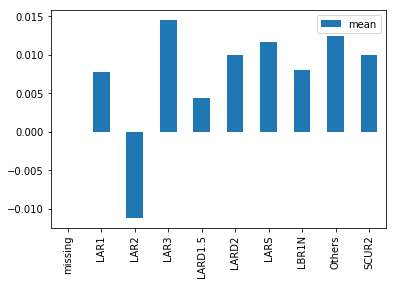

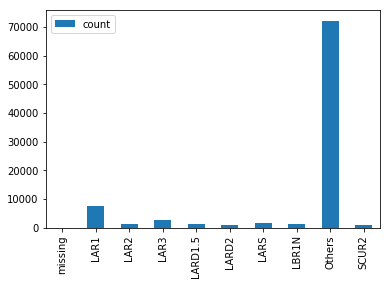

In [107]:
visualize_feature(df_train_2016, "propertyzoningdesc")

In [108]:
df_train_2016["propertyzoningdesc"].fillna("Missing",inplace = True)
dict_column['Categorical'].append("propertyzoningdesc")

**33) 'unitcnt'**      

Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)  

number of missing value : 58353  
ratio of missing value :0.353608

Most home has 1 unit, which is 54503, 93% among non-missing values. So fill missing values with 1. 

In [109]:
df_train_2016["unitcnt"].describe() 

count    58353.000000
mean         1.110414
std          0.797235
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        143.000000
Name: unitcnt, dtype: float64

In [110]:
df_train_2016["unitcnt"].unique() 

array([  1.,  nan,   2.,   4.,   3.,   6., 143.,  11.,   9.,   5.,  70.])

             mean
missing  0.011715
1.0      0.011616
2.0      0.010164
3.0     -0.002914
4.0      0.005813
5.0     -0.032500
6.0     -0.008000
9.0      0.014900
11.0    -0.013100
70.0     0.015900
143.0    0.036300
           count
missing  31922.0
1.0      54503.0
2.0       2354.0
3.0        619.0
4.0        871.0
5.0          1.0
6.0          1.0
9.0          1.0
11.0         1.0
70.0         1.0
143.0        1.0
             mean  count     max     min
unitcnt                                 
1.0      0.011616  54503  4.7370 -4.6050
2.0      0.010164   2354  2.9260 -1.6770
3.0     -0.002914    619  1.4690 -0.9467
4.0      0.005813    871  3.1150 -1.2040
5.0     -0.032500      1 -0.0325 -0.0325
6.0     -0.008000      1 -0.0080 -0.0080
9.0      0.014900      1  0.0149  0.0149
11.0    -0.013100      1 -0.0131 -0.0131
70.0     0.015900      1  0.0159  0.0159
143.0    0.036300      1  0.0363  0.0363


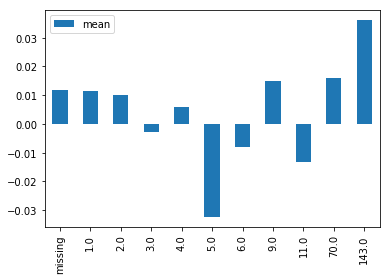

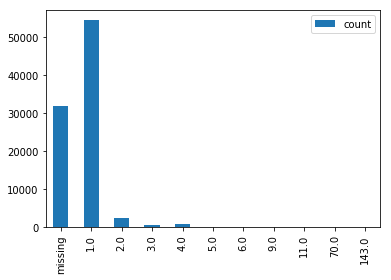

In [111]:
visualize_feature(df_train_2016, "unitcnt")

In [112]:
df_train_2016["unitcnt"].fillna(1,inplace = True)

**34) 'lotsizesquarefeet'**      

Area of the lot in square feet  

number of missing value : 80125  
ratio of missing value :0.112434

Every home has area of the lot in square feet. So fill it with mean. 

The average of area of the lot is 29110.16 square feet.

In [113]:
df_train_2016["lotsizesquarefeet"].describe() 

count    8.012500e+04
mean     2.911016e+04
std      1.217213e+05
min      1.670000e+02
25%      5.703000e+03
50%      7.200000e+03
75%      1.168600e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

                            mean
missing                 0.007159
(-6803.843, 697251.3]   0.011974
(697251.3, 1394335.6]   0.015951
(1394335.6, 2091419.9]  0.036851
(2091419.9, 2788504.2]  0.163800
(2788504.2, 3485588.5]       NaN
(3485588.5, 4182672.8] -0.015213
(4182672.8, 4879757.1]       NaN
(4879757.1, 5576841.4]       NaN
(5576841.4, 6273925.7]       NaN
(6273925.7, 6971010.0]  0.079763
                          count
missing                 10150.0
(-6803.843, 697251.3]   79797.0
(697251.3, 1394335.6]     269.0
(1394335.6, 2091419.9]     35.0
(2091419.9, 2788504.2]      1.0
(2788504.2, 3485588.5]      0.0
(3485588.5, 4182672.8]     15.0
(4182672.8, 4879757.1]      0.0
(4879757.1, 5576841.4]      0.0
(5576841.4, 6273925.7]      0.0
(6273925.7, 6971010.0]      8.0
                            mean  count     max     min
lotsizesquarefeet                                      
(-6803.843, 697251.3]   0.011974  79797  4.7370 -4.6050
(697251.3, 1394335.6]   0.015951    269  1.3160 -0.3

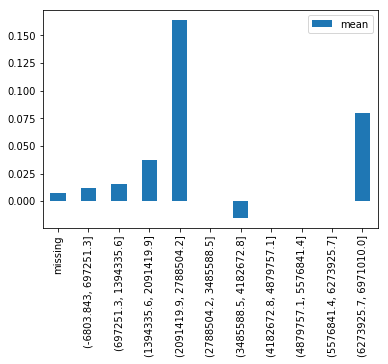

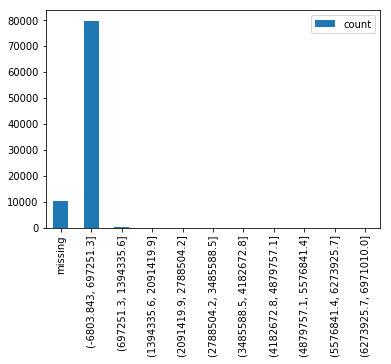

In [114]:
visualize_feature(df_train_2016, "lotsizesquarefeet", "cts",  10)

In [115]:
dict_column['Fill_mean'].append("lotsizesquarefeet")

**35) 'finishedsquarefeet12'**     

Finished living area  

number of missing value : 85596  
ratio of missing value :0.051831

Most home has finished living area. so fill missing values with mean value

In [116]:
df_train_2016["finishedsquarefeet12"].describe() 

count    85596.000000
mean      1745.454531
std        909.941166
min          2.000000
25%       1172.000000
50%       1518.000000
75%       2056.000000
max      20013.000000
Name: finishedsquarefeet12, dtype: float64

                        mean
missing             0.005279
(-18.011, 2003.1]   0.008721
(2003.1, 4004.2]    0.018718
(4004.2, 6005.3]    0.025066
(6005.3, 8006.4]    0.086716
(8006.4, 10007.5]   0.041449
(10007.5, 12008.6]  0.025035
(12008.6, 14009.7]  0.141537
(14009.7, 16010.8]  0.111950
(16010.8, 18011.9]  0.327900
(18011.9, 20013.0] -0.159750
                      count
missing              4679.0
(-18.011, 2003.1]   62754.0
(2003.1, 4004.2]    20628.0
(4004.2, 6005.3]     1812.0
(6005.3, 8006.4]      298.0
(8006.4, 10007.5]      69.0
(10007.5, 12008.6]     20.0
(12008.6, 14009.7]      8.0
(14009.7, 16010.8]      4.0
(16010.8, 18011.9]      1.0
(18011.9, 20013.0]      2.0
                          mean  count     max     min
finishedsquarefeet12                                 
(-18.011, 2003.1]     0.008721  62754  3.9680 -4.6050
(2003.1, 4004.2]      0.018718  20628  4.7370 -2.9760
(4004.2, 6005.3]      0.025066   1812  2.4500 -1.2590
(6005.3, 8006.4]      0.086716    298  3.2890 

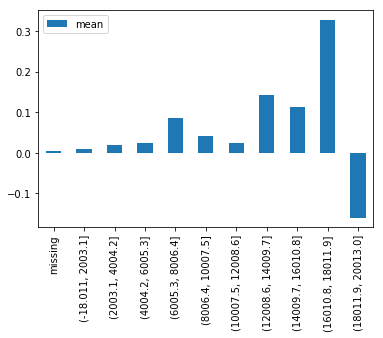

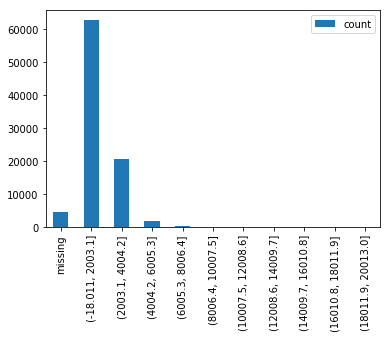

In [117]:
visualize_feature(df_train_2016, "finishedsquarefeet12", "cts", 10 )

In [118]:
dict_column['Fill_mean'].append("finishedsquarefeet12")

**36) 'regionidcity'**      

City in which the property is located (if any)  

number of non-missing value : 88472 out of 9
ratio of missing value :0.019972

the most frequent value is 12447 with 20559 of frequency. the second most frequent value is 46298 with 3000 of frequency. so fill missing values with the most frequent value, 12447. 

In [119]:
df_train_2016["regionidcity"].describe() 

count     88472.000000
mean      33761.332851
std       46672.393863
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64

In [120]:
mod_categorical("regionidcity", 0.01)

In [121]:
df_train_2016["regionidcity"].fillna(12447,inplace = True)
dict_column['Categorical'].append("regionidcity")

**37) 'fullbathcnt'**      

Number of full bathrooms (sink, shower + bathtub, and toilet) present in home  

number of non-missing value : 89093 out of  90275
ratio of missing value :0.013093

the most frequent value is 2 which occurs 44635. The second frequent value is 3 which has frequency of 21035. Mean is 2.2412. So fill missing values with 2. 

In [122]:
df_train_2016["fullbathcnt"].describe() 

count    89093.000000
mean         2.241231
std          0.963142
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: fullbathcnt, dtype: float64

In [123]:
df_train_2016["fullbathcnt"].unique()

array([ 2.,  3.,  4.,  1.,  5.,  8., nan,  9.,  7.,  6., 10., 12., 11.,
       20., 15.])

             mean
missing  0.009554
1.0      0.007092
2.0      0.009410
3.0      0.015119
4.0      0.020770
5.0      0.035621
6.0      0.021885
7.0      0.045909
8.0      0.051512
9.0     -0.016806
10.0     0.075454
11.0     0.066200
12.0    -0.457867
15.0    -0.371100
20.0    -0.032500
           count
missing   1182.0
1.0      16671.0
2.0      44635.0
3.0      21035.0
4.0       4541.0
5.0       1392.0
6.0        490.0
7.0        163.0
8.0        112.0
9.0         33.0
10.0        13.0
11.0         3.0
12.0         3.0
15.0         1.0
20.0         1.0
                 mean  count     max     min
fullbathcnt                                 
1.0          0.007092  16671  3.4430 -4.6050
2.0          0.009410  44635  3.9680 -4.6050
3.0          0.015119  21035  4.7370 -2.9760
4.0          0.020770   4541  3.2890 -2.3330
5.0          0.035621   1392  2.7620 -0.8164
6.0          0.021885    490  2.4500 -0.7550
7.0          0.045909    163  1.4230 -0.8440
8.0          0.051512    112  1.547

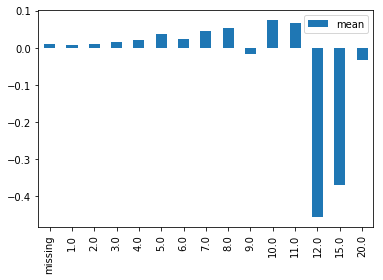

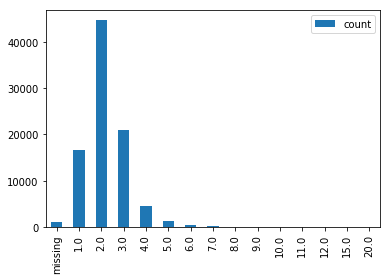

In [124]:
visualize_feature(df_train_2016, "fullbathcnt")

In [125]:
dict_column['Fill_0'].append("fullbathcnt")

**38) 'calculatedbathnbr'**      

Number of bathrooms in home including fractional bathroom  

number of non-missing value : 89093 out of 90275 
ratio of missing value :0.013093

the numbe of non-missing values are the same as the previous column "fullbathcnt". They both relate to btahroom.  so fill missing value with 2 like the previous column.

In [126]:
df_train_2016["calculatedbathnbr"].describe() 

count    89093.000000
mean         2.309216
std          0.976172
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: calculatedbathnbr, dtype: float64

             mean
missing  0.009554
1.0      0.007416
1.5      0.004112
2.0      0.009210
2.5      0.010128
3.0      0.014578
3.5      0.026498
4.0      0.018039
4.5      0.031845
5.0      0.037290
5.5      0.032696
6.0      0.018695
6.5      0.030885
7.0      0.047605
7.5      0.029100
8.0      0.050892
8.5     -0.020200
9.0      0.009989
10.0     0.068914
11.0     0.066200
12.0    -0.457867
15.0    -0.371100
20.0    -0.032500
           count
missing   1182.0
1.0      15035.0
1.5       1636.0
2.0      36534.0
2.5       8084.0
3.0      19946.0
3.5       1088.0
4.0       3743.0
4.5        793.0
5.0       1142.0
5.5        253.0
6.0        448.0
6.5         54.0
7.0        155.0
7.5          9.0
8.0        114.0
8.5          1.0
9.0         36.0
10.0        14.0
11.0         3.0
12.0         3.0
15.0         1.0
20.0         1.0
                       mean  count     max     min
calculatedbathnbr                                 
1.0                0.007416  15035  3.4430 -4.6050
1.5    

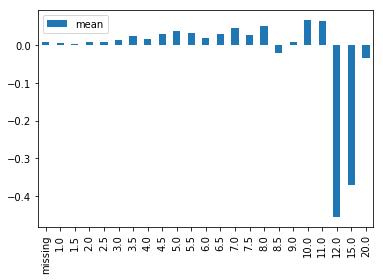

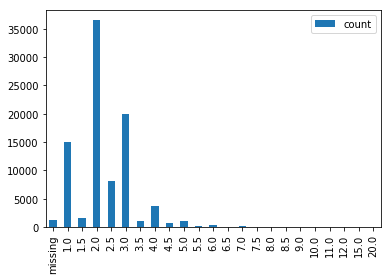

In [127]:
visualize_feature(df_train_2016, "calculatedbathnbr" )

In [128]:
df_train_2016["calculatedbathnbr"].fillna(2,inplace= True)

**39) 'yearbuilt'**      

The Year the principal residence was built   

number of missing value : 89519  
ratio of missing value :0.008374

50% of the data ranges from 1953 to 1987. so fill missing value with mean. 

In [129]:
df_train_2016["yearbuilt"].describe() 

count    89519.000000
mean      1968.532870
std         23.763475
min       1885.000000
25%       1953.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64

In [130]:
dict_column['Fill_mean'].append("yearbuilt")

                       mean
missing            0.007209
(1884.87, 1891.5]  0.038724
(1891.5, 1898.0]   0.005811
(1898.0, 1904.5]   0.000552
(1904.5, 1911.0]  -0.000110
(1911.0, 1917.5]   0.019859
(1917.5, 1924.0]   0.000852
(1924.0, 1930.5]   0.007469
(1930.5, 1937.0]   0.014287
(1937.0, 1943.5]   0.003149
(1943.5, 1950.0]   0.006590
(1950.0, 1956.5]   0.009388
(1956.5, 1963.0]   0.016298
(1963.0, 1969.5]   0.014050
(1969.5, 1976.0]   0.009140
(1976.0, 1982.5]   0.014650
(1982.5, 1989.0]   0.011232
(1989.0, 1995.5]   0.013457
(1995.5, 2002.0]   0.014984
(2002.0, 2008.5]   0.019738
(2008.5, 2015.0]   0.006054
                     count
missing              756.0
(1884.87, 1891.5]     29.0
(1891.5, 1898.0]      45.0
(1898.0, 1904.5]     147.0
(1904.5, 1911.0]     741.0
(1911.0, 1917.5]     696.0
(1917.5, 1924.0]    2982.0
(1924.0, 1930.5]    3007.0
(1930.5, 1937.0]    1305.0
(1937.0, 1943.5]    3041.0
(1943.5, 1950.0]    6947.0
(1950.0, 1956.5]   10512.0
(1956.5, 1963.0]    8369.0
(1963.

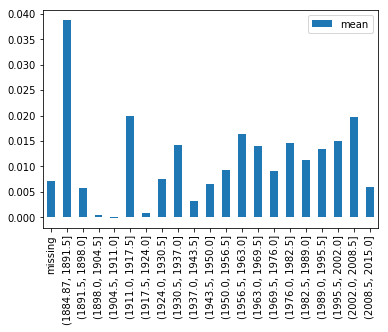

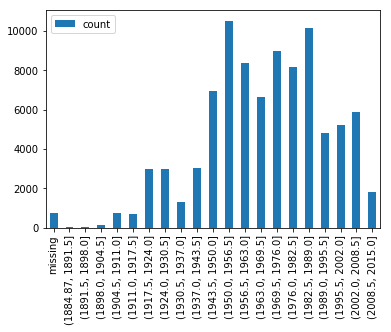

In [131]:
visualize_feature(df_train_2016, "yearbuilt",'cts',20)

**40) 'calculatedfinishedsquarefeet'**      

Calculated total finished living area of the home  

number of missing value : 89614  
ratio of missing value :0.007322

Most home has finished living area. So fill missing values with mean. 

In [132]:
df_train_2016["calculatedfinishedsquarefeet"].describe() 

count    89614.000000
mean      1773.185987
std        928.162393
min          2.000000
25%       1184.000000
50%       1540.000000
75%       2095.000000
max      22741.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [133]:
df_train_2016[df_train_2016["calculatedfinishedsquarefeet"]<= 10].calculatedfinishedsquarefeet

19326    2.0
Name: calculatedfinishedsquarefeet, dtype: float64

                           mean
missing               -0.002166
(-20.739, 2844.375]    0.009830
(2844.375, 5686.75]    0.023893
(5686.75, 8529.125]    0.069512
(8529.125, 11371.5]    0.040561
(11371.5, 14213.875]   0.100609
(14213.875, 17056.25]  0.155140
(17056.25, 19898.625]  0.051600
(19898.625, 22741.0]  -0.195150
                         count
missing                  661.0
(-20.739, 2844.375]    80329.0
(2844.375, 5686.75]     8724.0
(5686.75, 8529.125]      488.0
(8529.125, 11371.5]       54.0
(11371.5, 14213.875]      11.0
(14213.875, 17056.25]      5.0
(17056.25, 19898.625]      1.0
(19898.625, 22741.0]       2.0
                                  mean  count     max     min
calculatedfinishedsquarefeet                                 
(-20.739, 2844.375]           0.009830  80329  4.7370 -4.6050
(2844.375, 5686.75]           0.023893   8724  4.5200 -2.6880
(5686.75, 8529.125]           0.069512    488  3.2890 -1.2040
(8529.125, 11371.5]           0.040561     54  0.8809 -0.478

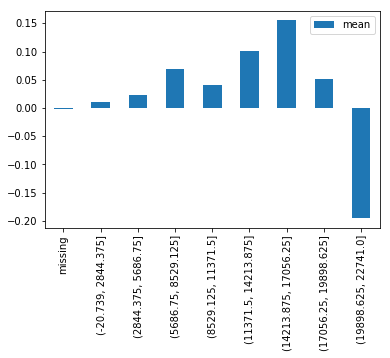

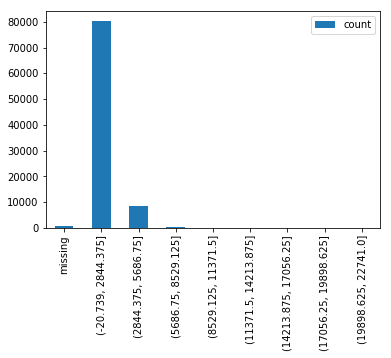

In [134]:
visualize_feature(df_train_2016, "calculatedfinishedsquarefeet", "cts", 8 )

In [135]:
dict_column['Fill_mean'].append("calculatedfinishedsquarefeet")

**41) 'censustractandblock'**      

Census tract and block ID combined - also contains blockgroup assignment by extension  

number of non-missing value : 89670 out of 90275  
ratio of missing value :0.006702

Fill missing value with the most frequent value. Number of unique value is 42398.Therefore  The value is combined numbers. the correlation between "logerror" and "censustractandblock" is only 0.00449. so delete the column.  

In [136]:
df_train_2016["censustractandblock"].describe() 

count    8.967000e+04
mean     6.049151e+13
std      2.046605e+11
min      6.037101e+13
25%      6.037320e+13
50%      6.037615e+13
75%      6.059042e+13
max      6.111009e+13
Name: censustractandblock, dtype: float64

In [137]:
len(df_train_2016["censustractandblock"].unique())

42399

                                            mean
missing                                -0.021799
(60370272021100.984, 60444919091002.9]  0.011477
(60444919091002.9, 60518827081004.8]         NaN
(60518827081004.8, 60592735071006.7]    0.010306
(60592735071006.7, 60666643061008.6]         NaN
(60666643061008.6, 60740551051010.49]  -0.011517
(60740551051010.49, 60814459041012.4]        NaN
(60814459041012.4, 60888367031014.3]         NaN
(60888367031014.3, 60962275021016.2]         NaN
(60962275021016.2, 61036183011018.1]         NaN
(61036183011018.1, 61110091001020.0]    0.018093
                                          count
missing                                   605.0
(60370272021100.984, 60444919091002.9]  58208.0
(60444919091002.9, 60518827081004.8]        0.0
(60518827081004.8, 60592735071006.7]    24348.0
(60592735071006.7, 60666643061008.6]        0.0
(60666643061008.6, 60740551051010.49]       6.0
(60740551051010.49, 60814459041012.4]       0.0
(60814459041012.4, 608883670

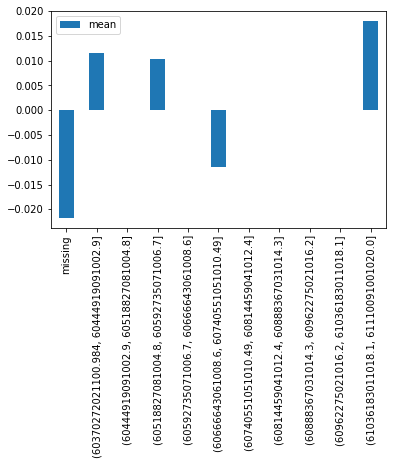

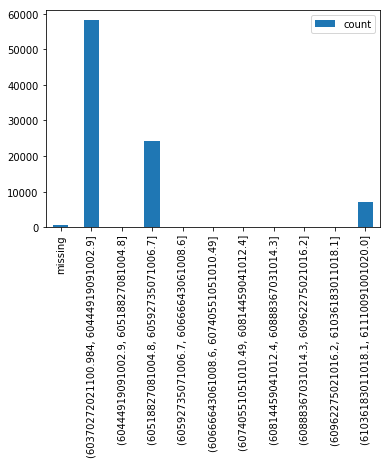

In [138]:
visualize_feature(df_train_2016, "censustractandblock", "cts", 10 )

In [139]:
len(df_train_2016["censustractandblock"].unique())

42399

In [140]:
df_train_2016["censustractandblock"].corr(df_train_2016["logerror"])

0.008892163197963366

In [141]:
dict_column["Drop"].append('censustractandblock')

**42) 'structuretaxvaluedollarcnt'**     

The assessed value of the built structure on the parcel  

number of non-missing value : 89895  
ratio of missing value :0.004209

It is the assessed value.So, fill missing values with mean. 

the number of cells less than 994900 is 89070, 98.6%.  

In [142]:
df_train_2016["structuretaxvaluedollarcnt"].describe() 

count    8.989500e+04
mean     1.800934e+05
std      2.091299e+05
min      1.000000e+02
25%      8.124500e+04
50%      1.320000e+05
75%      2.105345e+05
max      9.948100e+06
Name: structuretaxvaluedollarcnt, dtype: float64

                          mean
missing                    NaN
(-894.759, 99575.9]   0.012868
(99575.9, 199051.8]   0.008112
(199051.8, 298527.7]  0.010678
(298527.7, 398003.6]  0.015648
(398003.6, 497479.5]  0.017215
(497479.5, 596955.4]  0.019016
(596955.4, 696431.3]  0.033605
(696431.3, 795907.2]  0.018349
(795907.2, 895383.1]  0.031567
(895383.1, 994859.0]  0.022413
                        count
missing                   0.0
(-894.759, 99575.9]   30901.0
(99575.9, 199051.8]   34115.0
(199051.8, 298527.7]  13429.0
(298527.7, 398003.6]   5267.0
(398003.6, 497479.5]   2344.0
(497479.5, 596955.4]   1195.0
(596955.4, 696431.3]    763.0
(696431.3, 795907.2]    505.0
(795907.2, 895383.1]    304.0
(895383.1, 994859.0]    247.0
                                mean  count    max     min
structuretaxvaluedollarcnt                                
(-894.759, 99575.9]         0.012868  30901  3.443 -4.6050
(99575.9, 199051.8]         0.008112  34115  2.987 -4.5100
(199051.8, 298527.7]        0.01

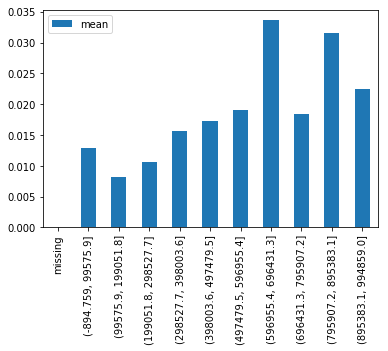

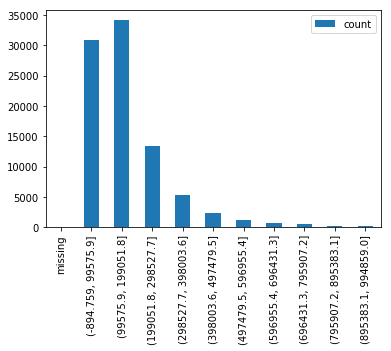

In [143]:
visualize_feature(df_train_2016[df_train_2016["structuretaxvaluedollarcnt"]<994900], "structuretaxvaluedollarcnt", "cts",10  )

In [144]:
dict_column['Fill_mean'].append("structuretaxvaluedollarcnt")

**43) 'regionidzip'**      

Zip code in which the property is located  

number of non-missing value : 90240 out of 90275 
ratio of missing value :0.000388

Every property has zip code. There are 388 unique values and missing values are 35. Therefore, fill missing values with the most frequent value. The most frequent value is 97319 and it is 1% of entire data. All variables consist less than 1% of entire data.  Therefore, group categorical data to 4 groups using percentile. 

In [145]:
df_train_2016["regionidzip"].describe() 

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

In [147]:
df_train_2016["regionidzip"].value_counts()/90240

97319.0     0.010106
96987.0     0.009996
96974.0     0.009131
97329.0     0.008422
97318.0     0.008045
97118.0     0.007968
97328.0     0.007801
96993.0     0.007613
96996.0     0.007092
96962.0     0.006915
96193.0     0.006571
96995.0     0.006316
96368.0     0.006206
97116.0     0.006051
96385.0     0.005773
96964.0     0.005718
96998.0     0.005685
96505.0     0.005674
96954.0     0.005663
96989.0     0.005585
96373.0     0.005541
97091.0     0.005519
96186.0     0.005474
96377.0     0.005463
96364.0     0.005275
96389.0     0.005253
97078.0     0.005253
97083.0     0.005142
96351.0     0.005053
96236.0     0.004976
              ...   
96038.0     0.000410
96986.0     0.000388
96135.0     0.000388
96323.0     0.000366
96980.0     0.000366
96207.0     0.000355
97037.0     0.000355
96119.0     0.000332
96434.0     0.000332
96021.0     0.000321
96973.0     0.000299
96951.0     0.000288
97316.0     0.000288
95998.0     0.000233
97331.0     0.000222
95991.0     0.000199
97119.0     0

              mean
missing   0.033360
95982.0  -0.064497
95983.0   0.042029
95984.0  -0.045426
95985.0  -0.024602
95986.0   0.010054
95987.0  -0.003515
95988.0  -0.041900
95989.0   0.003222
95991.0   0.005300
95992.0  -0.015486
95993.0  -0.018873
95994.0   0.012009
95995.0   0.011925
95996.0   0.027197
95997.0   0.007630
95998.0   0.007190
95999.0  -0.003548
96000.0   0.029596
96001.0   0.006003
96002.0  -0.081200
96003.0  -0.001914
96004.0   0.035039
96005.0   0.049155
96006.0   0.012389
96007.0   0.009004
96008.0   0.017586
96009.0  -0.013957
96010.0   0.025802
96012.0   0.010001
...            ...
97089.0   0.035032
97091.0   0.023237
97094.0   0.036133
97097.0   0.018348
97098.0   0.013200
97099.0   0.017594
97101.0   0.024423
97104.0   0.006381
97106.0   0.022168
97107.0   0.022576
97108.0   0.049650
97109.0   0.012066
97111.0   0.019800
97113.0   0.046528
97116.0   0.009697
97118.0   0.023271
97119.0  -0.006894
97298.0   0.039774
97316.0   0.061696
97317.0   0.000031
97318.0   0.

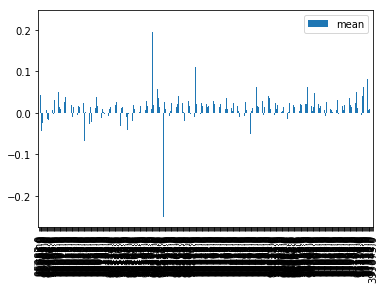

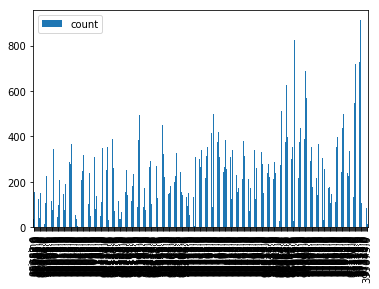

In [148]:
visualize_feature(df_train_2016, "regionidzip")

In [149]:
df_train_2016['regionidzip'].describe()

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

In [150]:
# modifiy categorical data using quentile. change each part of data to the value of each percentiles. 

def mod_categorical_pct(var,n):
    
    # store values for each percentile 
    percentile = []
    for k in range(1,n):
        percentile.append(df_train_2016[var].quantile(k/n))

    # save the first part of data which is smaller than first percentile. 
    df_train_2016[var].ix[df_train_2016[var] <= percentile[0]] = df_train_2016[var].min()
    
    
    for k in range(0,n-2):
        llimit = percentile[k]
        ulimit = percentile[k+1]
        df_train_2016[var].ix[ (df_train_2016[var] <= ulimit) & (df_train_2016[var] > llimit)] = percentile[k]
    
    df_train_2016[var].ix[ (df_train_2016[var] >= ulimit) ] = percentile[n-2]





In [151]:
df_train_2016["regionidzip"].fillna(97319,inplace = True)
mod_categorical_pct('regionidzip',4)
dict_column['Categorical'].append("regionidzip")

/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-de

**44) 'taxamount'**     

The total property tax assessed for that assessment year  

number of missing value : 90269  
ratio of missing value :0.000066

Most home, 89445, 99% has the total property tax less than 32230. 

In [152]:
df_train_2016["taxamount"].describe() 

count     90269.000000
mean       5983.975927
std        6838.876956
min          49.080000
25%        2872.830000
50%        4542.750000
75%        6901.090000
max      321936.090000
Name: taxamount, dtype: float64

                              mean
missing                   0.009533
(-272.807, 32237.781]     0.011453
(32237.781, 64426.482]    0.006276
(64426.482, 96615.183]    0.053759
(96615.183, 128803.884]   0.023816
(128803.884, 160992.585]  0.024193
(160992.585, 193181.286]  0.015125
(193181.286, 225369.987]       NaN
(225369.987, 257558.688] -0.238300
(257558.688, 289747.389] -0.371100
(289747.389, 321936.09]   0.019633
                            count
missing                       6.0
(-272.807, 32237.781]     89445.0
(32237.781, 64426.482]      681.0
(64426.482, 96615.183]       94.0
(96615.183, 128803.884]      25.0
(128803.884, 160992.585]     15.0
(160992.585, 193181.286]      4.0
(193181.286, 225369.987]      0.0
(225369.987, 257558.688]      1.0
(257558.688, 289747.389]      1.0
(289747.389, 321936.09]       3.0
                              mean  count     max     min
taxamount                                                
(-272.807, 32237.781]     0.011453  89445  4.7370 -4.605

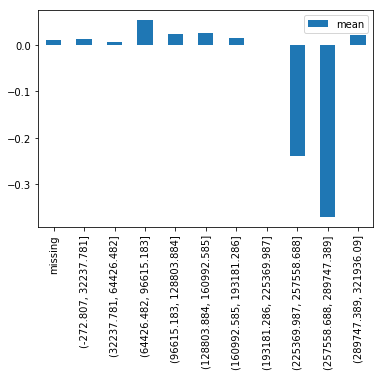

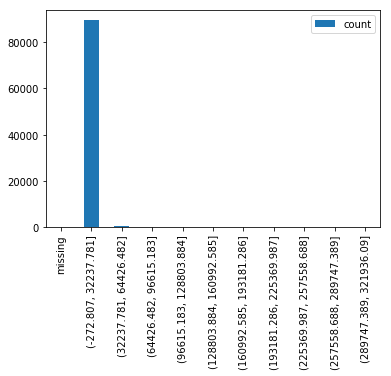

In [153]:
visualize_feature(df_train_2016, "taxamount", "cts", 10 )

                            mean
missing                      NaN
(16.907, 3266.374]      0.018196
(3266.374, 6483.668]    0.006914
(6483.668, 9700.962]    0.009307
(9700.962, 12918.256]   0.012574
(12918.256, 16135.55]   0.010990
(16135.55, 19352.844]   0.015387
(19352.844, 22570.138] -0.002318
(22570.138, 25787.432]  0.003251
(25787.432, 29004.726]  0.036884
(29004.726, 32222.02]   0.042379
                          count
missing                     0.0
(16.907, 3266.374]      27933.0
(3266.374, 6483.668]    36883.0
(6483.668, 9700.962]    14225.0
(9700.962, 12918.256]    5113.0
(12918.256, 16135.55]    2250.0
(16135.55, 19352.844]    1183.0
(19352.844, 22570.138]    808.0
(22570.138, 25787.432]    490.0
(25787.432, 29004.726]    343.0
(29004.726, 32222.02]     217.0
                            mean  count    max     min
taxamount                                             
(16.907, 3266.374]      0.018196  27933  3.160 -2.3650
(3266.374, 6483.668]    0.006914  36883  3.443 -4.6050


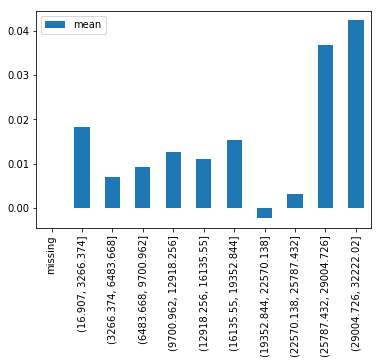

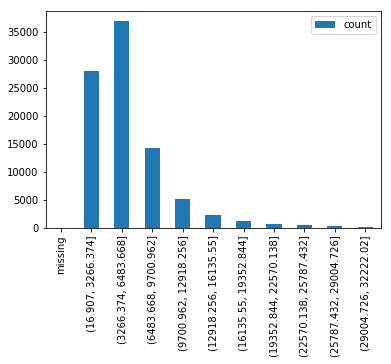

In [154]:
visualize_feature(df_train_2016[df_train_2016["taxamount"]<32230], "taxamount", "cts", 10 )

In [155]:
dict_column['Fill_mean'].append("taxamount")

**45) 'taxvaluedollarcnt'**     

The total tax assessed value of the parcel  

number of non-missing value : 90274 out of 90275 
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with mean. 

99.345% of home has the total tax assessed less than 2775019

In [156]:
df_train_2016["taxvaluedollarcnt"].describe() 

count    9.027400e+04
mean     4.576726e+05
std      5.548844e+05
min      2.200000e+01
25%      1.990232e+05
50%      3.428720e+05
75%      5.405890e+05
max      2.775000e+07
Name: taxvaluedollarcnt, dtype: float64

                              mean
missing                  -0.301100
(-27727.978, 2775019.8]   0.011338
(2775019.8, 5550017.6]    0.025250
(5550017.6, 8325015.4]    0.049502
(8325015.4, 11100013.2]  -0.003191
(11100013.2, 13875011.0]  0.026708
(13875011.0, 16650008.8]  0.171767
(16650008.8, 19425006.6]       NaN
(19425006.6, 22200004.4]       NaN
(22200004.4, 24975002.2] -0.371100
(24975002.2, 27750000.0]  0.019633
                            count
missing                       1.0
(-27727.978, 2775019.8]   89585.0
(2775019.8, 5550017.6]      562.0
(5550017.6, 8325015.4]       86.0
(8325015.4, 11100013.2]      22.0
(11100013.2, 13875011.0]     12.0
(13875011.0, 16650008.8]      3.0
(16650008.8, 19425006.6]      0.0
(19425006.6, 22200004.4]      0.0
(22200004.4, 24975002.2]      1.0
(24975002.2, 27750000.0]      3.0
                              mean  count     max     min
taxvaluedollarcnt                                        
(-27727.978, 2775019.8]   0.011338  89585  4.7370 -4.605

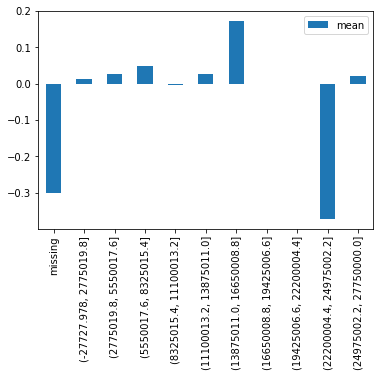

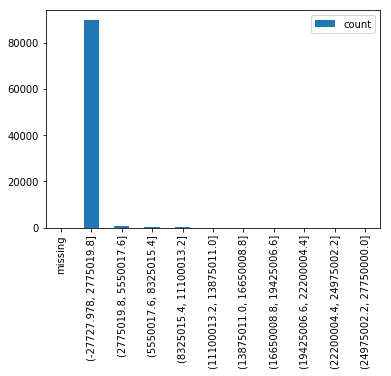

In [157]:
visualize_feature(df_train_2016, "taxvaluedollarcnt", "cts", 10 )

                            mean
missing                      NaN
(-2752.978, 277519.8]   0.013397
(277519.8, 555017.6]    0.008117
(555017.6, 832515.4]    0.011119
(832515.4, 1110013.2]   0.015843
(1110013.2, 1387511.0]  0.019296
(1387511.0, 1665008.8]  0.021615
(1665008.8, 1942506.6] -0.005658
(1942506.6, 2220004.4] -0.004951
(2220004.4, 2497502.2]  0.046062
(2497502.2, 2775000.0]  0.025856
                          count
missing                     0.0
(-2752.978, 277519.8]   35016.0
(277519.8, 555017.6]    33691.0
(555017.6, 832515.4]    12276.0
(832515.4, 1110013.2]    4159.0
(1110013.2, 1387511.0]   1878.0
(1387511.0, 1665008.8]   1038.0
(1665008.8, 1942506.6]    639.0
(1942506.6, 2220004.4]    416.0
(2220004.4, 2497502.2]    273.0
(2497502.2, 2775000.0]    199.0
                            mean  count    max     min
taxvaluedollarcnt                                     
(-2752.978, 277519.8]   0.013397  35016  3.160 -2.3650
(277519.8, 555017.6]    0.008117  33691  3.443 -4.6050


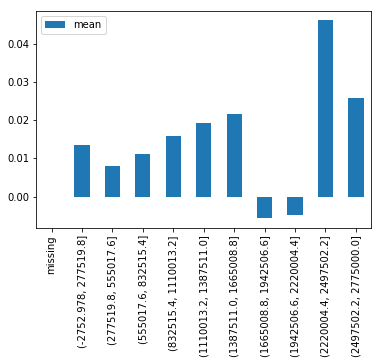

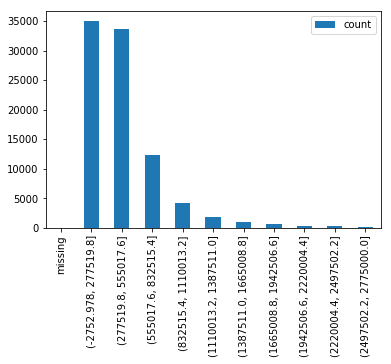

In [158]:
visualize_feature(df_train_2016[df_train_2016["taxvaluedollarcnt"]<2775019], "taxvaluedollarcnt", "cts", 10 )

In [159]:

dict_column['Fill_mean'].append("taxvaluedollarcnt")

**46) 'landtaxvaluedollarcnt'**     

The assessed value of the land area of the parcel  

number of non-missing value : 90274  
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with mean. 

Most home, 89896, 99.58%, has the assessed balue of the land area less than 2450019

In [160]:
df_train_2016["landtaxvaluedollarcnt"].describe() 

count    9.027400e+04
mean     2.783353e+05
std      4.004955e+05
min      2.200000e+01
25%      8.222800e+04
50%      1.929700e+05
75%      3.454195e+05
max      2.450000e+07
Name: landtaxvaluedollarcnt, dtype: float64

                              mean
missing                  -0.301100
(-24477.978, 2450019.8]   0.011454
(2450019.8, 4900017.6]    0.003145
(4900017.6, 7350015.4]    0.067857
(7350015.4, 9800013.2]    0.072143
(9800013.2, 12250011.0]  -0.001133
(12250011.0, 14700008.8]  0.065400
(14700008.8, 17150006.6] -0.371100
(17150006.6, 19600004.4] -0.022300
(19600004.4, 22050002.2]       NaN
(22050002.2, 24500000.0]  0.103500
                            count
missing                       1.0
(-24477.978, 2450019.8]   89896.0
(2450019.8, 4900017.6]      306.0
(4900017.6, 7350015.4]       46.0
(7350015.4, 9800013.2]       14.0
(9800013.2, 12250011.0]       6.0
(12250011.0, 14700008.8]      2.0
(14700008.8, 17150006.6]      1.0
(17150006.6, 19600004.4]      2.0
(19600004.4, 22050002.2]      0.0
(22050002.2, 24500000.0]      1.0
                              mean  count     max     min
landtaxvaluedollarcnt                                    
(-24477.978, 2450019.8]   0.011454  89896  4.7370 -4.605

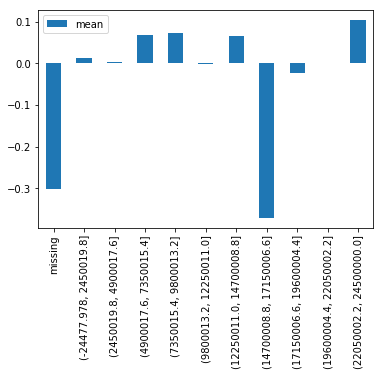

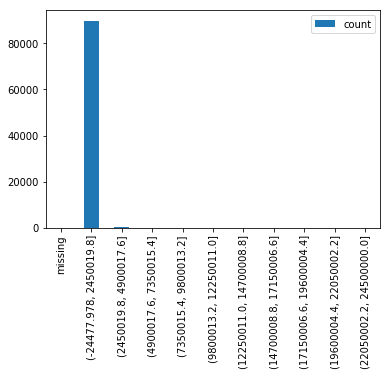

In [161]:
visualize_feature(df_train_2016, "landtaxvaluedollarcnt", "cts", 10 )

In [162]:
dict_column['Fill_mean'].append("landtaxvaluedollarcnt")

**47) 'propertycountylandusecode'**      

County land use code i.e. it's zoning at the county level  

    number of non- missing value : 90274  
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with the most frequent value. There are 77 unique values on the column. The most frequent is "0100" with 34%. There are 12 values that each value consists of more than 1% of entire datay. I would change any values with less than 1% of the entire data to others. 

In [163]:
df_train_2016["propertycountylandusecode"].describe() 

count     90274
unique       77
top        0100
freq      30846
Name: propertycountylandusecode, dtype: object

In [164]:
len(df_train_2016["propertycountylandusecode"].unique())

78

In [165]:
df_train_2016["propertycountylandusecode"].value_counts()/90274

0100    0.341693
122     0.170403
010C    0.113698
0101    0.082360
34      0.065866
1111    0.043013
1       0.032291
010E    0.025323
010D    0.024470
0200    0.023850
1129    0.018200
1110    0.012373
0400    0.008275
0300    0.006403
012C    0.005793
1128    0.003944
0104    0.003855
01DC    0.002780
010V    0.002227
01HC    0.001639
38      0.001174
96      0.001152
0103    0.001108
010G    0.000886
010H    0.000798
010M    0.000654
0700    0.000598
1210    0.000521
1117    0.000510
0108    0.000510
          ...   
0401    0.000044
020G    0.000044
0110    0.000044
012D    0.000044
105     0.000044
0102    0.000033
1012    0.000022
1011    0.000022
030G    0.000022
1432    0.000022
1421    0.000022
0210    0.000011
0114    0.000011
200     0.000011
0130    0.000011
020M    0.000011
0301    0.000011
1722    0.000011
0131    0.000011
010     0.000011
040A    0.000011
0       0.000011
1420    0.000011
01DD    0.000011
1200    0.000011
6050    0.000011
0303    0.000011
0111    0.0000

             mean
missing -0.005000
0        0.113300
010      0.025700
0100     0.012205
0101     0.005372
0102     0.085167
0103     0.018330
0104     0.010697
0108     0.011802
0109     0.296270
010C     0.011473
010D     0.012941
010E     0.015078
010F     0.041118
010G    -0.047361
010H     0.045622
010M     0.062476
010V    -0.020767
0110     0.030375
0111     0.065800
0114    -0.006000
012C     0.001474
012D     0.035075
012E     0.054743
0130     0.018800
0131    -0.023300
01DC     0.009622
01DD    -1.374000
01HC     0.034455
0200     0.012367
...           ...
1014    -0.030816
105     -0.001150
1110     0.027631
1111     0.014445
1112     0.029480
1116     0.166200
1117     0.050300
1128     0.013998
1129     0.018452
1200     1.301000
1210     0.001489
122      0.012161
1222    -0.036264
1310    -0.108725
1321     0.079886
1333     0.290400
135     -0.034040
1410     0.019877
1420     0.133700
1421     0.030050
1432    -0.095150
1720     0.241371
1722    -2.688000
200     -0

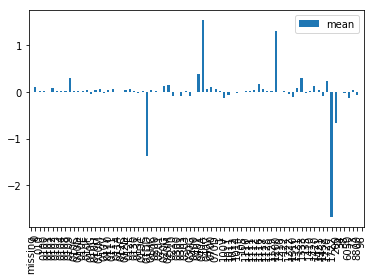

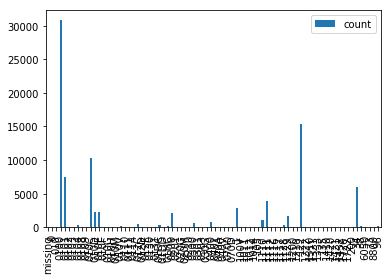

In [166]:
visualize_feature(df_train_2016, "propertycountylandusecode" )

In [167]:
df_train_2016["propertycountylandusecode"].fillna( '0100',inplace = True)


**There are additional 14 columns which do not have missing value. **

In [168]:
df_train_2016.dropna(axis=1).columns
dict_column['Categorical'].append("propertycountylandusecode")
mod_categorical("propertycountylandusecode",0.01)

**48) 'bedroomcnt'**      

Number of bedrooms in home 

- most of property,39%, has 3 bedrooms. 
- 86% of property has 2~4 bedrooms. 
- It looks like property with many bedrooms have large mean of logerror. However, it is not true because mean out of fewer size of values tends to have larger mean.   


In [169]:
df_train_2016["bedroomcnt" ].describe()

count    90275.000000
mean         3.031869
std          1.156436
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

             mean
missing       NaN
0.0      0.010944
1.0      0.011159
2.0      0.005349
3.0      0.010568
4.0      0.015527
5.0      0.024326
6.0      0.021985
7.0      0.052069
8.0      0.018215
9.0      0.021235
10.0    -0.030040
11.0    -0.025492
12.0     0.024905
13.0    -0.046000
14.0    -0.138400
15.0    -0.169600
16.0     0.102375
           count
missing      0.0
0.0       1421.0
1.0       3897.0
2.0      22357.0
3.0      35447.0
4.0      20279.0
5.0       5077.0
6.0       1120.0
7.0        234.0
8.0        274.0
9.0         91.0
10.0        35.0
11.0        12.0
12.0        22.0
13.0         1.0
14.0         3.0
15.0         1.0
16.0         4.0
                mean  count     max     min
bedroomcnt                                 
0.0         0.010944   1421  2.5600 -2.6880
1.0         0.011159   3897  2.9530 -1.2980
2.0         0.005349  22357  4.7370 -3.1940
3.0         0.010568  35447  3.4430 -4.6050
4.0         0.015527  20279  4.5200 -2.3540
5.0         0.024326   5077

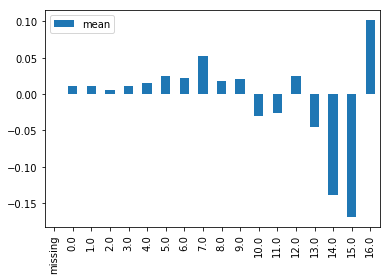

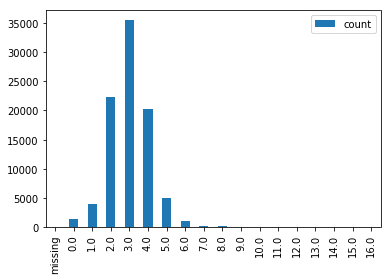

In [170]:
visualize_feature(df_train_2016, "bedroomcnt" )

**49) 'bathroomcnt'**      

Number of bathrooms in home including fractional bathrooms

- Mean of the number of bathroom is 2.27 and 96.64% of home has less than 4 bathrooms. 

In [171]:
df_train_2016["bathroomcnt"].describe() 

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

                  mean
missing            NaN
(-0.02, 2.0]  0.008580
(2.0, 4.0]    0.014254
(4.0, 6.0]    0.031986
(6.0, 8.0]    0.045512
(8.0, 10.0]   0.025573
(10.0, 12.0] -0.195833
(12.0, 14.0]       NaN
(14.0, 16.0] -0.371100
(16.0, 18.0]       NaN
(18.0, 20.0] -0.032500
                count
missing           0.0
(-0.02, 2.0]  54375.0
(2.0, 4.0]    32871.0
(4.0, 6.0]     2638.0
(6.0, 8.0]      332.0
(8.0, 10.0]      51.0
(10.0, 12.0]      6.0
(12.0, 14.0]      0.0
(14.0, 16.0]      1.0
(16.0, 18.0]      0.0
(18.0, 20.0]      1.0
                  mean  count     max     min
bathroomcnt                                  
(-0.02, 2.0]  0.008580  54375  3.9680 -4.6050
(2.0, 4.0]    0.014254  32871  4.7370 -4.6050
(4.0, 6.0]    0.031986   2638  3.2890 -0.8164
(6.0, 8.0]    0.045512    332  1.5470 -0.8604
(8.0, 10.0]   0.025573     51  0.4898 -0.4780
(10.0, 12.0] -0.195833      6  0.2593 -1.2040
(12.0, 14.0]       NaN      0     NaN     NaN
(14.0, 16.0] -0.371100      1 -0.3711 -0.3711


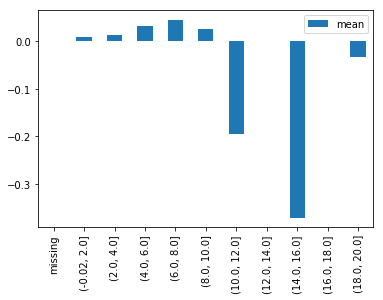

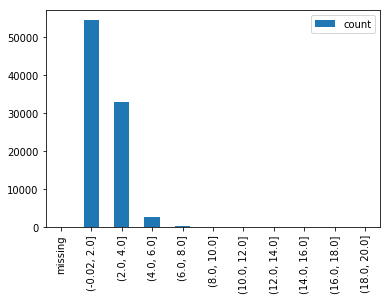

In [172]:
visualize_feature(df_train_2016, "bathroomcnt", "cts", 10 )

**50) 'parcelid'**    Unique identifier for parcels (lots) 

Every home has its unique identifier. 

In [173]:
df_train_2016["parcelid"].describe() 

count    9.027500e+04
mean     1.298466e+07
std      2.504510e+06
min      1.071174e+07
25%      1.155950e+07
50%      1.254734e+07
75%      1.422755e+07
max      1.629608e+08
Name: parcelid, dtype: float64

**51) 'propertylandusetypeid'**      

Type of land use the property is zoned for

- 261 is the most frequent value which is 67.17%, 266 is the second most frequent value which is 25.27%. there are 14 unique values. 

In [174]:
dict_column['Categorical'].append("propertylandusetypeid")

df_train_2016["propertylandusetypeid"].describe() 

count    90275.000000
mean       261.832179
std          5.182901
min         31.000000
25%        261.000000
50%        261.000000
75%        266.000000
max        275.000000
Name: propertylandusetypeid, dtype: float64

In [175]:
len(df_train_2016["propertylandusetypeid"].unique())

14

             mean
missing       NaN
31.0    -0.034371
47.0     1.301000
246.0    0.009442
247.0   -0.004608
248.0    0.005385
260.0    0.004606
261.0    0.012080
263.0    0.104256
264.0    0.047591
265.0    0.013998
266.0    0.010381
267.0    0.041118
269.0    0.009400
275.0    0.050300
           count
missing      0.0
31.0        17.0
47.0         1.0
246.0     2376.0
247.0      629.0
248.0      879.0
260.0       62.0
261.0    60637.0
263.0       84.0
264.0       11.0
265.0      356.0
266.0    22815.0
267.0       28.0
269.0     2334.0
275.0       46.0
                           mean  count     max     min
propertylandusetypeid                                 
31.0                  -0.034371     17  1.0700 -2.6880
47.0                   1.301000      1  1.3010  1.3010
246.0                  0.009442   2376  2.9260 -1.6770
247.0                 -0.004608    629  1.4690 -0.9755
248.0                  0.005385    879  3.1150 -1.2040
260.0                  0.004606     62  0.6549 -0.6714


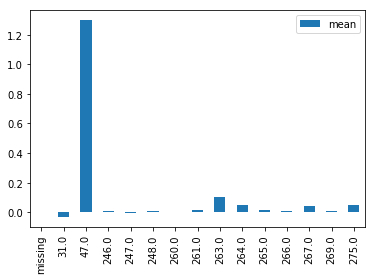

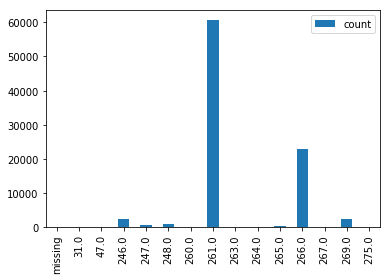

In [176]:
visualize_feature(df_train_2016, "propertylandusetypeid" )

**52) 'longitude'**      Longitude of the middle of the parcel multiplied by 10e6

In [177]:
df_train_2016["longitude"].describe() 

count    9.027500e+04
mean    -1.181989e+08
std      3.606032e+05
min     -1.194479e+08
25%     -1.184117e+08
50%     -1.181734e+08
75%     -1.179216e+08
max     -1.175549e+08
Name: longitude, dtype: float64

In [178]:
#visualize_feature(df_train_2016, "longitude")

**53) 'latitude'**      

Latitude of the middle of the parcel multiplied by 10e6

In [179]:
df_train_2016["latitude"].describe() 

count    9.027500e+04
mean     3.400541e+07
std      2.649654e+05
min      3.333930e+07
25%      3.381154e+07
50%      3.402150e+07
75%      3.417274e+07
max      3.481601e+07
Name: latitude, dtype: float64

                                mean
missing                          NaN
(33337818.286, 33486966.4]  0.013265
(33486966.4, 33634637.8]    0.008682
(33634637.8, 33782309.2]    0.013008
(33782309.2, 33929980.6]    0.008989
(33929980.6, 34077652.0]    0.009100
(34077652.0, 34225323.4]    0.013908
(34225323.4, 34372994.8]    0.016383
(34372994.8, 34520666.2]    0.010269
(34520666.2, 34668337.6]    0.010407
(34668337.6, 34816009.0]    0.007125
                              count
missing                         0.0
(33337818.286, 33486966.4]   1283.0
(33486966.4, 33634637.8]     6294.0
(33634637.8, 33782309.2]    11910.0
(33782309.2, 33929980.6]    17058.0
(33929980.6, 34077652.0]    16426.0
(34077652.0, 34225323.4]    22007.0
(34225323.4, 34372994.8]     7556.0
(34372994.8, 34520666.2]     3612.0
(34520666.2, 34668337.6]     2603.0
(34668337.6, 34816009.0]     1526.0
                                mean  count    max     min
latitude                                                  
(33337

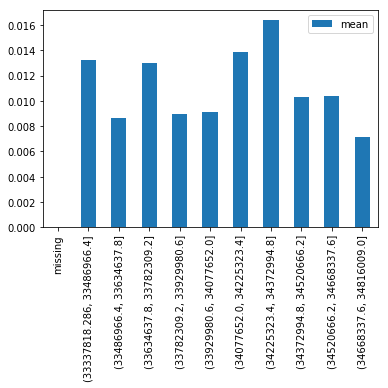

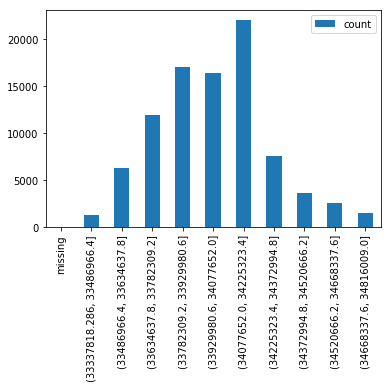

In [180]:
visualize_feature(df_train_2016, "latitude", "cts", 10 )

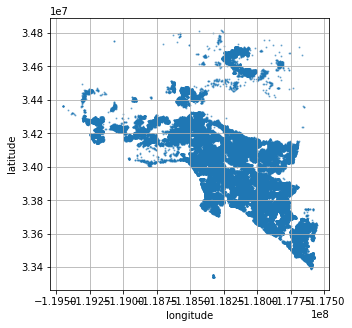

In [181]:
y= df_train_2016['latitude']
x= df_train_2016['longitude']
s=1
plt.figure(figsize=(5,5))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)
plt.show()

**54) 'fips'**      

Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details

In [182]:
dict_column['Categorical'].append("fips")
df_train_2016["fips"].describe() 

count    90275.000000
mean      6048.870551
std         20.663461
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64

             mean
missing       NaN
6037.0   0.011191
6059.0   0.010392
6111.0   0.017255
           count
missing      0.0
6037.0   58574.0
6059.0   24505.0
6111.0    7196.0
            mean  count    max    min
fips                                 
6037.0  0.011191  58574  4.737 -4.605
6059.0  0.010392  24505  3.289 -2.976
6111.0  0.017255   7196  3.018 -4.605


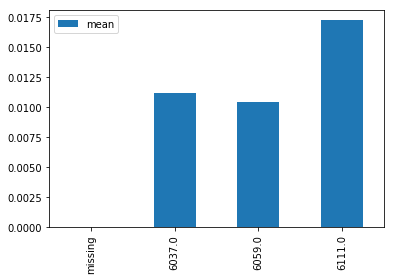

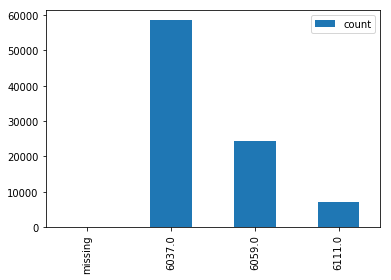

In [183]:
visualize_feature(df_train_2016, "fips" )

**55) 'rawcensustractandblock'**      

Census tract and block ID combined - also contains blockgroup assignment by extension. There are 42647 unique values among 95125 data. There are not much information. so delete the column. 

In [184]:
len(df_train_2016["rawcensustractandblock"].unique() )

42647

                                  mean
missing                            NaN
(60370272.021, 60444919.091]  0.011191
(60444919.091, 60518827.081]       NaN
(60518827.081, 60592735.071]  0.010392
(60592735.071, 60666643.061]       NaN
(60666643.061, 60740551.051]       NaN
(60740551.051, 60814459.041]       NaN
(60814459.041, 60888367.031]       NaN
(60888367.031, 60962275.021]       NaN
(60962275.021, 61036183.011]       NaN
(61036183.011, 61110091.001]  0.017255
                                count
missing                           0.0
(60370272.021, 60444919.091]  58574.0
(60444919.091, 60518827.081]      0.0
(60518827.081, 60592735.071]  24505.0
(60592735.071, 60666643.061]      0.0
(60666643.061, 60740551.051]      0.0
(60740551.051, 60814459.041]      0.0
(60814459.041, 60888367.031]      0.0
(60888367.031, 60962275.021]      0.0
(60962275.021, 61036183.011]      0.0
(61036183.011, 61110091.001]   7196.0
                                  mean  count    max    min
rawcensustractan

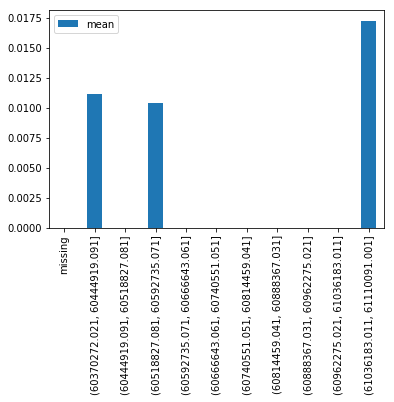

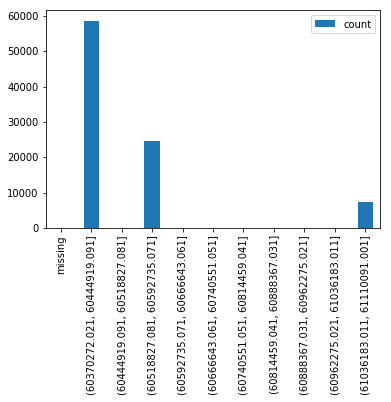

In [185]:
visualize_feature(df_train_2016, "rawcensustractandblock", "cts", 10 )


In [186]:
dict_column['Drop'].append("rawcensustractandblock")
dict_column['Drop'].append("transactiondate")

**56) 'regionidcounty'**     County in which the property is located

In [187]:
dict_column['Categorical'].append("regionidcounty")
df_train_2016["regionidcounty"].describe() 

count    90275.000000
mean      2525.420770
std        805.694842
min       1286.000000
25%       1286.000000
50%       3101.000000
75%       3101.000000
max       3101.000000
Name: regionidcounty, dtype: float64

In [188]:
len(df_train_2016["regionidcounty"].unique())

3

                        mean
missing                  NaN
(1284.185, 1467.5]  0.010392
(1467.5, 1649.0]         NaN
(1649.0, 1830.5]         NaN
(1830.5, 2012.0]         NaN
(2012.0, 2193.5]    0.017255
(2193.5, 2375.0]         NaN
(2375.0, 2556.5]         NaN
(2556.5, 2738.0]         NaN
(2738.0, 2919.5]         NaN
(2919.5, 3101.0]    0.011191
                      count
missing                 0.0
(1284.185, 1467.5]  24505.0
(1467.5, 1649.0]        0.0
(1649.0, 1830.5]        0.0
(1830.5, 2012.0]        0.0
(2012.0, 2193.5]     7196.0
(2193.5, 2375.0]        0.0
(2375.0, 2556.5]        0.0
(2556.5, 2738.0]        0.0
(2738.0, 2919.5]        0.0
(2919.5, 3101.0]    58574.0
                        mean  count    max    min
regionidcounty                                   
(1284.185, 1467.5]  0.010392  24505  3.289 -2.976
(1467.5, 1649.0]         NaN      0    NaN    NaN
(1649.0, 1830.5]         NaN      0    NaN    NaN
(1830.5, 2012.0]         NaN      0    NaN    NaN
(2012.0, 2193.5]

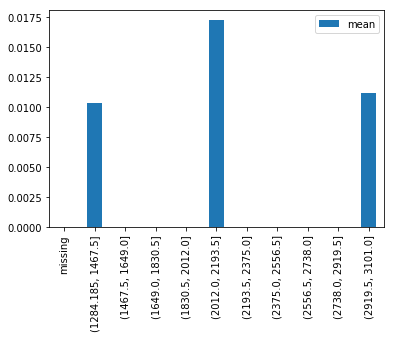

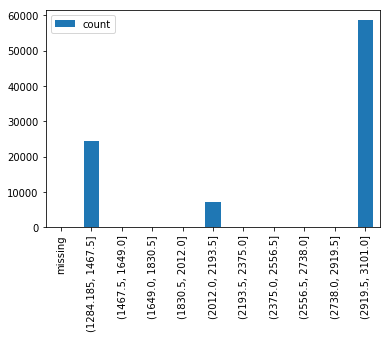

In [189]:
visualize_feature(df_train_2016, "regionidcounty", "cts", 10 )

**57) 'roomcnt'**      Total number of rooms in the principal residence

In [190]:
df_train_2016["roomcnt"].describe() 

count    90275.000000
mean         1.478516
std          2.819627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: roomcnt, dtype: float64

                   mean
missing             NaN
(-0.018, 1.8]  0.011183
(1.8, 3.6]     0.029758
(3.6, 5.4]     0.007976
(5.4, 7.2]     0.011313
(7.2, 9.0]     0.015875
(9.0, 10.8]    0.021691
(10.8, 12.6]   0.053190
(12.6, 14.4]   0.178507
(14.4, 16.2]   0.063000
(16.2, 18.0]  -0.016100
                 count
missing            0.0
(-0.018, 1.8]  69703.0
(1.8, 3.6]       281.0
(3.6, 5.4]      5159.0
(5.4, 7.2]      9840.0
(7.2, 9.0]      4766.0
(9.0, 10.8]      364.0
(10.8, 12.6]     144.0
(12.6, 14.4]      15.0
(14.4, 16.2]       2.0
(16.2, 18.0]       1.0
                   mean  count     max     min
roomcnt                                       
(-0.018, 1.8]  0.011183  69703  4.7370 -4.6050
(1.8, 3.6]     0.029758    281  0.9999 -0.6033
(3.6, 5.4]     0.007976   5159  1.6620 -2.3030
(5.4, 7.2]     0.011313   9840  3.2890 -4.6050
(7.2, 9.0]     0.015875   4766  3.0180 -2.3230
(9.0, 10.8]    0.021691    364  1.0770 -0.9014
(10.8, 12.6]   0.053190    144  1.8470 -0.4339
(12.6, 14.4] 

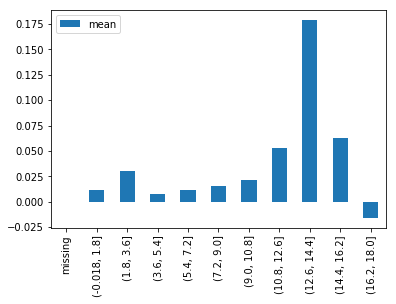

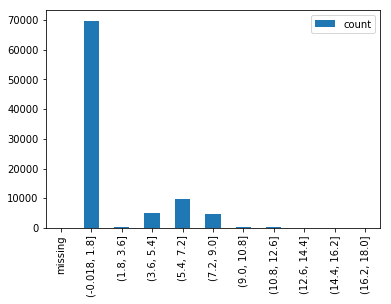

In [191]:
visualize_feature(df_train_2016, "roomcnt", "cts", 10 )

**58) 'assessmentyear'**     The year of the property tax assessment. All value is 2015. So delete the column

In [192]:
df_train_2016["assessmentyear"].describe() 

count    90275.0
mean      2015.0
std          0.0
min       2015.0
25%       2015.0
50%       2015.0
75%       2015.0
max       2015.0
Name: assessmentyear, dtype: float64

In [193]:

df_train_2016.drop(columns="assessmentyear",inplace=True)

Let's check which columns to drop, fill with 0 or fill with mean. I stored the name of each columns in a dictionary , dict_column.  

In [194]:
dict_column

{'Drop': ['buildingclasstypeid',
  'finishedsquarefeet13',
  'storytypeid',
  'yardbuildingsqft26',
  'architecturalstyletypeid',
  'typeconstructiontypeid',
  'finishedsquarefeet6',
  'decktypeid',
  'poolsizesum',
  'pooltypeid10',
  'pooltypeid2',
  'finishedsquarefeet15',
  'finishedfloor1squarefeet',
  'finishedsquarefeet50',
  'pooltypeid7',
  'numberofstories',
  'garagetotalsqft',
  'garagecarcnt',
  'regionidneighborhood',
  'censustractandblock',
  'rawcensustractandblock',
  'transactiondate'],
 'Fill_0': ['basementsqft',
  'taxdelinquencyyear',
  'yardbuildingsqft17',
  'fireplacecnt',
  'threequarterbathnbr',
  'poolcnt',
  'airconditioningtypeid',
  'heatingorsystemtypeid',
  'fullbathcnt'],
 'Fill_mean': ['buildingqualitytypeid',
  'lotsizesquarefeet',
  'finishedsquarefeet12',
  'yearbuilt',
  'calculatedfinishedsquarefeet',
  'structuretaxvaluedollarcnt',
  'taxamount',
  'taxvaluedollarcnt',
  'landtaxvaluedollarcnt'],
 'Categorical': ['taxdelinquencyflag',
  'aircond

Let's delete or fill columns with 0 or mean . 

In [195]:
df_train_2016.drop(columns=dict_column["Drop"],inplace=True)


In [196]:
for value in dict_column["Fill_0"]:
    df_train_2016[value].fillna(0, inplace = True)
       

In [197]:
for value in dict_column["Fill_mean"]:
    df_train_2016[value].fillna(df_train_2016[value].mean(), inplace = True)
       

In [198]:
df_train_2016.drop(columns="parcelid",inplace=True)

In [199]:
df_train_2016.head().transpose()

,0,1,2,3,4
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
airconditioningtypeid,1,0,1,1,0
basementsqft,0,0,0,0,0
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingqualitytypeid,4,5.56541,4,4,5.56541
calculatedbathnbr,2,3.5,3,2,2.5
calculatedfinishedsquarefeet,1684,2263,2217,839,2283
finishedsquarefeet12,1684,2263,2217,839,2283
fips,6037,6059,6037,6037,6059


## Outliers

Let's draw a scatter plot on "logerror", then we can find that there are some outliers at the end of both sides. 

Our task in the project is to find where the zillow algorithm fails. These outliers mean where the zillow algorithm fails the most, it can have important information.  Thus, I will leave outliers just like that. 


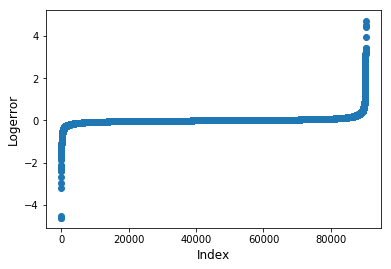

In [201]:
# Draw scatter plot with logerror to check outliers

plt.scatter(range(df_train_2016.shape[0]), df_train_2016.sort_values(by='logerror')['logerror'])
plt.xlabel('Index', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.show()

In [202]:
df_train_2016.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [203]:


freq_table = pd.DataFrame(0,index = range(-4,6),columns = range(1))

for i in range(df_train_2016.shape[0]):
    if df_train_2016.logerror[i] < -4 :
        freq_table[0][-4] += 1
    elif df_train_2016.logerror[i] < -3:
        freq_table[0][-3] += 1
    elif df_train_2016.logerror[i] < -2:
        freq_table[0][-2] += 1
    elif df_train_2016.logerror[i] < -1:
        freq_table[0][-1] += 1
    elif df_train_2016.logerror[i] < 0:
        freq_table[0][0] += 1
    elif df_train_2016.logerror[i] < 1:
        freq_table[0][1] += 1
    elif df_train_2016.logerror[i] < 2:
        freq_table[0][2] += 1
    elif df_train_2016.logerror[i] < 3:
        freq_table[0][3] += 1
    elif df_train_2016.logerror[i] < 4:
        freq_table[0][4] += 1
    else :
        freq_table[0][5] += 1
        
        

In [204]:
freq_table

,0
-4,3
-3,1
-2,43
-1,69
0,39551
1,50382
2,160
3,52
4,11
5,3


# Data Storytelling

## Distribution of Logerror

We would check both logerror and absolute value of logerror. Logerror indicates wheather estimated house values has been underestimated or overestimated while absolute logerror tells us that how estimated house value is close to an actual house value. It seems like the distribution of logerror follows a normal distribution.

In [205]:
df_train_2016.shape

(90275, 36)

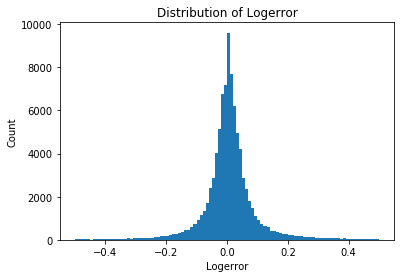

In [206]:
#Distribution of Logerror

plt.hist(df_train_2016.logerror,100, range=[-0.5, 0.5])
plt.title("Distribution of Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

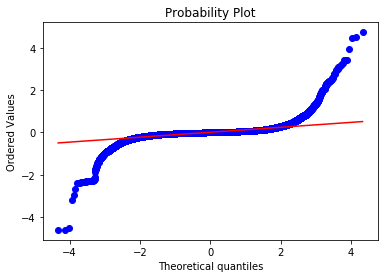

In [207]:
# Draw QQ plot to check normality

import pylab
import scipy.stats as stats

stats.probplot(df_train_2016.logerror, dist="norm", plot=pylab)
pylab.show()



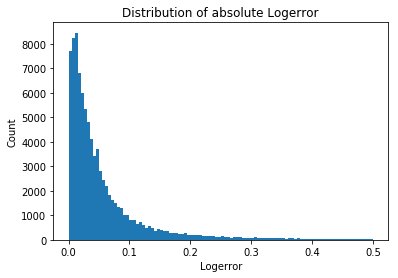

In [208]:
#Distribution of absolute Logerror

plt.hist(abs(df_train_2016.logerror),100,range=[0, 0.5])
plt.title("Distribution of absolute Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

## Transaction dates

Let's check the distribution of transaction dates, there are fewer transactions after October

In [209]:
df_train_2016.shape

(90275, 36)

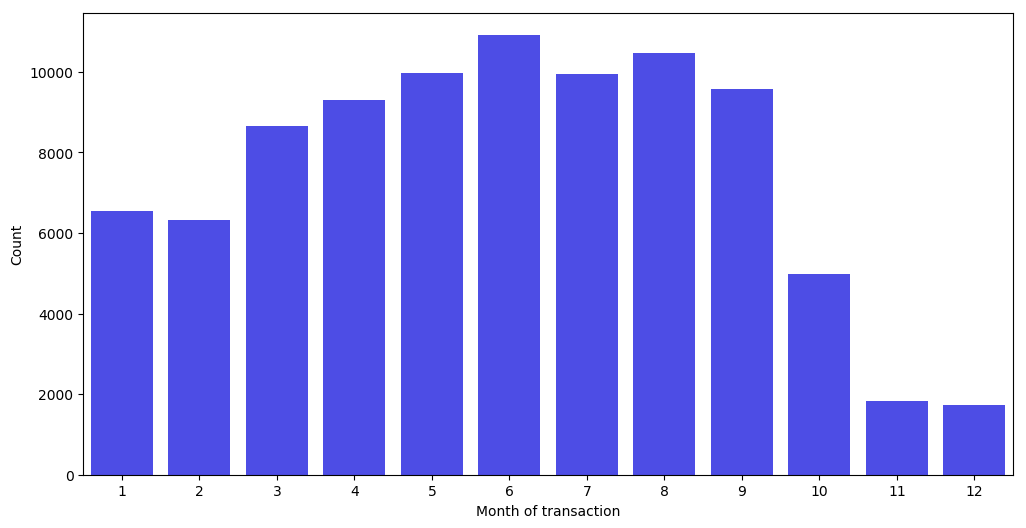

In [296]:
#Distribution of transaction dates for training dataset

trs_month = df_train_2016['transactiondate'].dt.month.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(trs_month.index, trs_month.values, alpha=0.8,color ='blue' )

plt.xlabel('Month of transaction')
plt.ylabel('Count')
plt.show()



Let's see how absolute logerror change over time. We can see that logerror is getting better over time. 

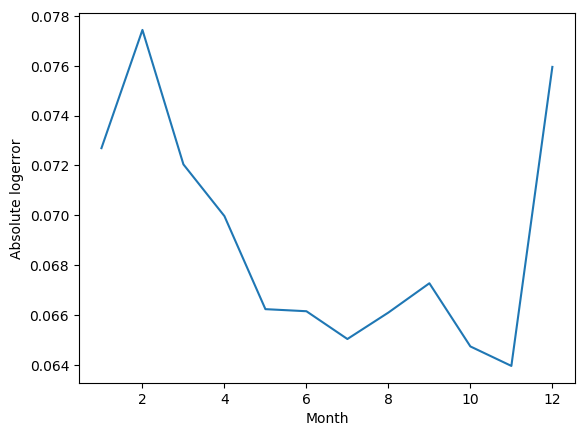

In [297]:
# store month data to moth_data
month_data = pd.DataFrame()
month_data['month']= df_train_2016['transactiondate'].dt.month

month_data['logerror'] = abs(df_train_2016['logerror'])

df_train_2016['abs_logerror']= abs(df_train_2016['logerror'])

# draw graph of logerror for each month
plt.plot(month_data.groupby('month', axis=0).mean())
plt.ylabel('Absolute logerror')
plt.xlabel('Month')
plt.show()



## Built year

Let's find out when most of house was built. We can find that most of houses are built between 1950 and 1990. Logerror is getting smaller with newer houses. 

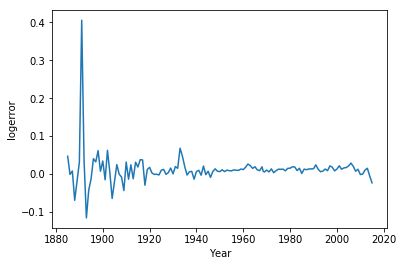

In [212]:
# draw graph on built year
year_data = pd.DataFrame()
year_data['year']= df_train_2016['yearbuilt']

year_data['logerror'] = (df_train_2016['logerror'])


plt.plot(year_data.groupby('year', axis=0).mean())
plt.ylabel('logerror')
plt.xlabel("Year")
plt.show()



Text(0,0.5,'Frequency')

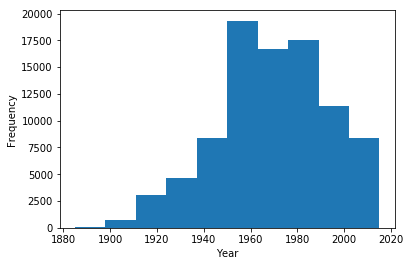

In [213]:
plt.hist(year_data['year'])
plt.xlabel("Year")
plt.ylabel("Frequency")


In [214]:
# Portion of houses built between 1950 and 19

(year_data[year_data['year']<1990][year_data['year']>1950].year.size)/ year_data.shape[0]

/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.593785654943229

In [215]:
year_data.shape[0]

90275

## Overall assessment of condition of the building 

"buildingqualitytypei" is overall assessment of condition of the building rates from best (lowest) to worst (highest) between 1 to 12. The mean is 5.56 and 68.9% of data are between 5 to 8. 

In [306]:
df_train_2016.buildingqualitytypeid.describe()

count    90275.000000
mean         5.565407
std          1.515046
min          1.000000
25%          4.000000
50%          5.565407
75%          7.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64

In [314]:
# check how much percent of data are between 5 and 8

btw_5_8 = len(df_train_2016[(df_train_2016["buildingqualitytypeid"]>5) & (df_train_2016["buildingqualitytypeid"]<8) ].buildingqualitytypeid)/ len(df_train_2016["buildingqualitytypeid"])

print(btw_5_8*100)

68.92605926336195


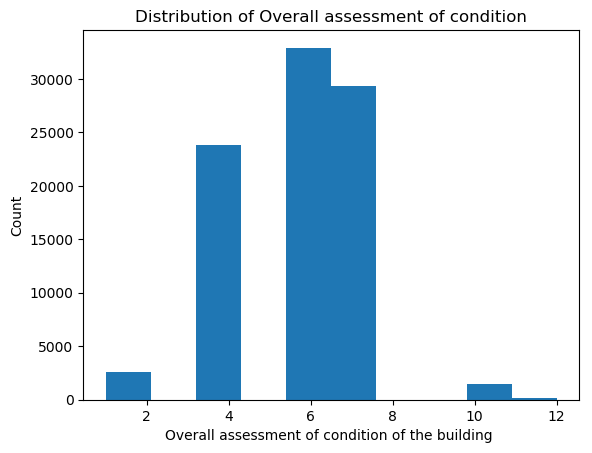

In [303]:
plt.hist((df_train_2016.buildingqualitytypeid.dropna()))
plt.title("Distribution of Overall assessment of condition")
plt.xlabel("Overall assessment of condition of the building ")
plt.ylabel("Count")
plt.show()

## Area of the lot 

"lotsizesquarefeet" is area of the lot in square feet. The mean of lot size is 29110. 25% of the data is between 5962 and 7570. The maximum is 6971010.  

In [316]:
df_train_2016.lotsizesquarefeet.describe()

count    9.027500e+04
mean     2.911016e+04
std      1.146744e+05
min      1.670000e+02
25%      5.962000e+03
50%      7.570000e+03
75%      2.212500e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

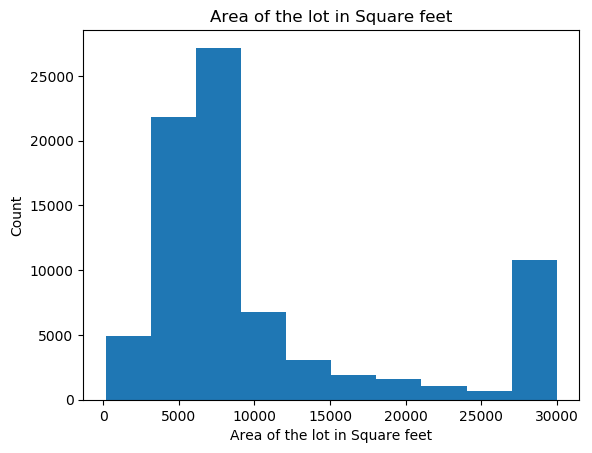

In [319]:
lot_size = df_train_2016.lotsizesquarefeet.dropna()
plt.hist(lot_size[lot_size<30000])
plt.title("Area of the lot in Square feet")
plt.xlabel("Area of the lot in Square feet")
plt.ylabel("Count")
plt.show()


## The assessed value of the built structure 

"structuretaxvaluedollarcnt" is the assessed value of the built structure. The mean value of it is 180093 and maximum is 9948100

In [337]:
df_train_2016.structuretaxvaluedollarcnt.describe()

count    9.027500e+04
mean     1.800934e+05
std      2.086893e+05
min      1.000000e+02
25%      8.149000e+04
50%      1.325970e+05
75%      2.100425e+05
max      9.948100e+06
Name: structuretaxvaluedollarcnt, dtype: float64

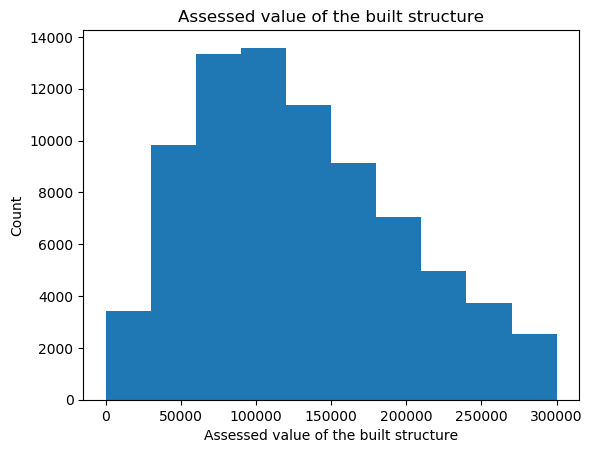

In [340]:
ass_value = df_train_2016.structuretaxvaluedollarcnt.dropna()
plt.hist(ass_value[ass_value<300000])
plt.title("Assessed value of the built structure")
plt.xlabel("Assessed value of the built structure")
plt.ylabel("Count")bbb

## tax

"taxamount" is the total property tax assessed for that assessment year. The mean is 5983. 

In [341]:
df_train_2016.taxamount.describe()

count     90275.000000
mean       5983.975927
std        6838.649682
min          49.080000
25%        2872.885000
50%        4543.020000
75%        6900.600000
max      321936.090000
Name: taxamount, dtype: float64

Text(0,0.5,'Count')

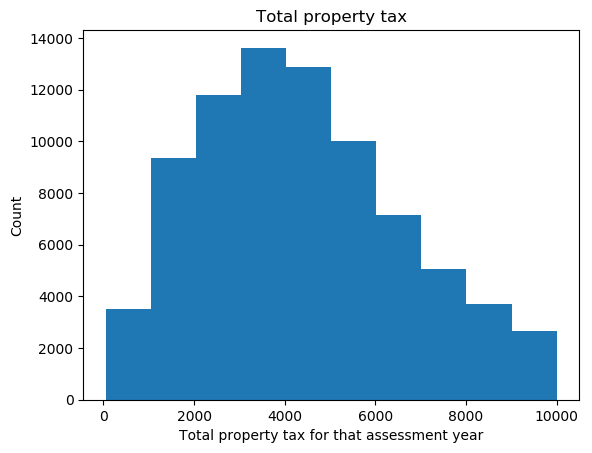

In [345]:
ass_value = df_train_2016.taxamount.dropna()
plt.hist(ass_value[ass_value<10000])
plt.title("Total property tax")
plt.xlabel("Total property tax for that assessment year")
plt.ylabel("Count")

## Inferential Statistics

Let's check correlations of each variables to "logerror" to see how variables are related.

Correlation between target variable, logerror, and dependent variables are all weak. They are between 0.237380 and -0.018009


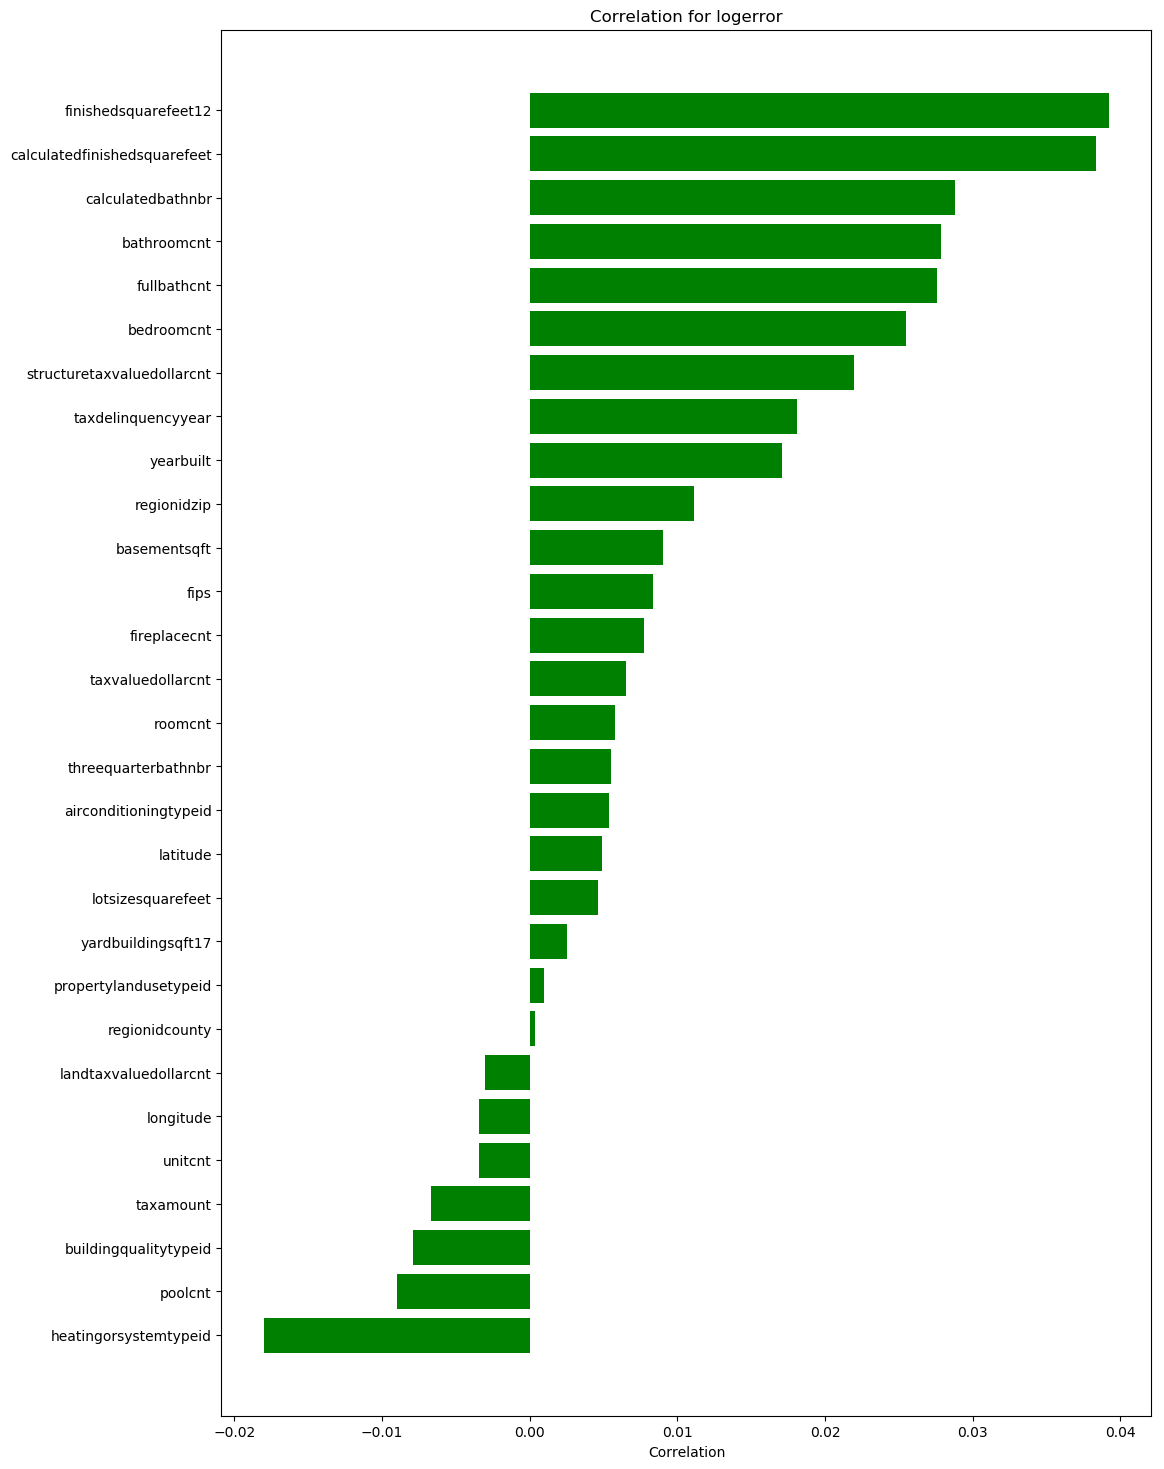

In [217]:
# Correlations for logerror 
#df_train_2016.drop(columns="abs_logerror",inplace = True)
corr = df_train_2016.corr()


corr_logerror = corr.loc["logerror",:] [ corr.loc["logerror",:].notnull() ].reset_index()
corr_logerror.columns = ["index",'corr']
corr_logerror_sorted = corr_logerror.sort_values(by='corr', ascending=False )[1:]



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,18))

y_pos = np.arange(len(corr_logerror_sorted))


ax.barh(y_pos, corr_logerror_sorted['corr'],   color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_logerror_sorted['index'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Correlation for logerror')

plt.show()



In [218]:
#corr["logerror"].sort_values(by='ratio', ascending=False )

corr.sort_values(by='logerror', ascending=False )["logerror"]

logerror                        1.000000
finishedsquarefeet12            0.039248
calculatedfinishedsquarefeet    0.038341
calculatedbathnbr               0.028788
bathroomcnt                     0.027889
fullbathcnt                     0.027571
bedroomcnt                      0.025467
structuretaxvaluedollarcnt      0.021935
taxdelinquencyyear              0.018107
yearbuilt                       0.017089
regionidzip                     0.011111
basementsqft                    0.009019
fips                            0.008363
fireplacecnt                    0.007746
taxvaluedollarcnt               0.006508
roomcnt                         0.005760
threequarterbathnbr             0.005490
airconditioningtypeid           0.005404
latitude                        0.004915
lotsizesquarefeet               0.004612
yardbuildingsqft17              0.002497
propertylandusetypeid           0.001003
regionidcounty                  0.000341
landtaxvaluedollarcnt          -0.003051
longitude       

Let's check correlations between pairs of independent variables. We can find that there are 2 clusters on the heat map below. The first cluster on the top left shows that variables about sizes of houses such as bathroom size or bedroom size and total square feets are stronly related. The second cluster on the bottom right tells us that variables about taxes are related to each other. Alse, we can observe from the right top cluster that variables about sizes of houses are weakly related to variables about taxes. It is reasonable because the bigger a house is, the more expensive the property is resulting the more taxes. However, the price of house is not only resulted from the size of house. So correlation is not strong among them. 

There are not variables which can be particularly significant in terms of predicting logerror based on correlation. Also, there are strong multicollinearity between dependent variables. Therefore, a linear regression is not suitable for the model because of multicollinearity.    

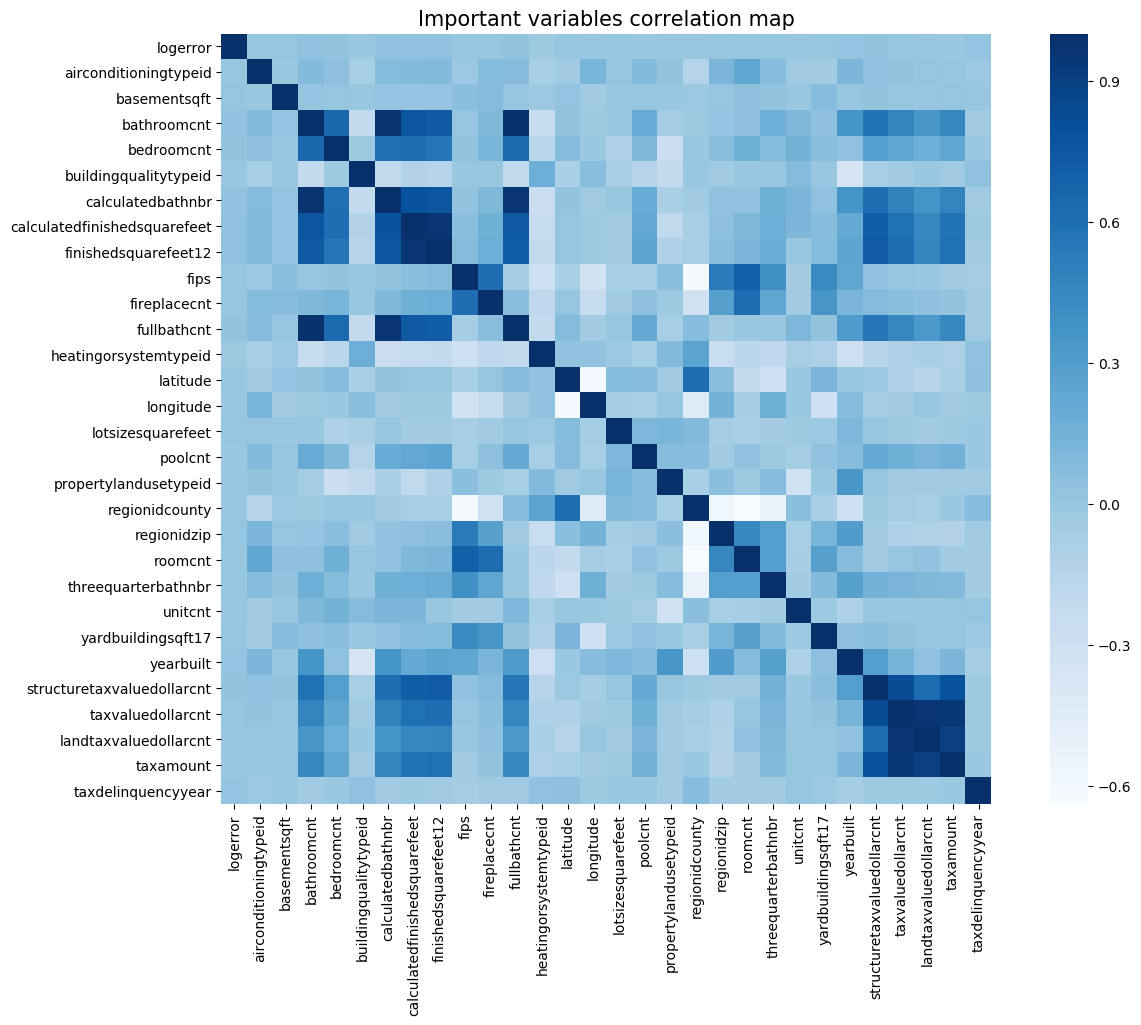

In [219]:
import seaborn as sns
color = sns.color_palette()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmax=1.0, square=True, cmap="Blues")
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [220]:
dict_column['Categorical']

['taxdelinquencyflag',
 'airconditioningtypeid',
 'heatingorsystemtypeid',
 'propertyzoningdesc',
 'regionidcity',
 'regionidzip',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'fips',
 'regionidcounty']

# Analysis 

To apply machine learning, we need to convert categorical and object data for Sklearn package.  

In [221]:
from sklearn.linear_model import lasso_path, enet_path
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
import sklearn.linear_model as linear_model

/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in

In [242]:
df_train_2016_tmp = df_train_2016.copy()


In [223]:
# Drop target variable, categorical data and object data to convert them for Scikit-Learn.


In [243]:
df_train_2016_tmp.loc[df_train_2016_tmp['hashottuborspa']=='True', 'hashottuborspa'] = 1.0
df_train_2016_tmp.loc[df_train_2016_tmp['hashottuborspa']!='True', 'hashottuborspa'] = 0.0

In [244]:
df_train_2016_tmp.loc[df_train_2016_tmp['fireplaceflag']!='False', 'fireplaceflag'] = 1.0
df_train_2016_tmp.loc[df_train_2016_tmp['fireplaceflag']=='False', 'fireplaceflag'] = 0.0




In [245]:
dict_column['Categorical']

['taxdelinquencyflag',
 'airconditioningtypeid',
 'heatingorsystemtypeid',
 'propertyzoningdesc',
 'regionidcity',
 'regionidzip',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'fips',
 'regionidcounty']

In [246]:
# Convert categorical data to dummies data. 

for k in range(0,len(dict_column['Categorical'])):
    
    df_dummies = pd.get_dummies(df_train_2016_tmp[dict_column['Categorical'][k]])
    columns = df_dummies.columns.values
    
    # Change name of columns. 
    new_column = []
    for i in range(0,len(columns)):
        new_column.append( dict_column['Categorical'][k] + "_"+str(columns[i]))
    df_dummies.columns = new_column
    
    df_train_2016_tmp = df_train_2016_tmp.join(df_dummies ,rsuffix = "._u")

  

In [247]:
# target variable is logerror
Y = df_train_2016['logerror']


X = df_train_2016_tmp.drop(columns=['logerror'])
X_new = X.drop(columns=dict_column['Categorical'])



propertycountylandusecode: Type of land use the property is zoned for
  
propertyzoningdesc: Description of the allowed land uses (zoning) for that property
   
taxdelinquencyflag: Property taxes for this parcel are past due as of 2015, N or Y

Let's check how many different values variables above have. 

In [250]:
#X = df_train_2016_tmp.drop(columns=['logerror', 'propertycountylandusecode','propertyzoningdesc','taxdelinquencyflag','transactiondate'])



In [248]:
X_new.loc[:, X_new.dtypes == np.object].columns

Index([], dtype='object')

In [ ]:
#X_new =X.copy() 

In [ ]:
#X_new['num_propertycountylandusecode'] = num_propertycountylandusecode
#X_new['num_propertyzoningdesc'] = num_propertyzoningdesc
#X_new['num_taxdelinquencyflag'] = num_taxdelinquencyflag
#X_new['num_transactiondate'] = num_transactiondate

In [251]:
X_new.columns

Index(['basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'hashottuborspa',
       ...
       'propertylandusetypeid_266.0', 'propertylandusetypeid_267.0',
       'propertylandusetypeid_269.0', 'propertylandusetypeid_275.0',
       'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'regionidcounty_1286.0',
       'regionidcounty_2061.0', 'regionidcounty_3101.0'],
      dtype='object', length=116)

In [252]:
X_new.shape

(90275, 116)

In [253]:
train_X = X_new
train_Y = df_train_2016.logerror

In [254]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

In [255]:
X_new.dtypes

basementsqft                        float64
bathroomcnt                         float64
bedroomcnt                          float64
buildingqualitytypeid               float64
calculatedbathnbr                   float64
calculatedfinishedsquarefeet        float64
finishedsquarefeet12                float64
fireplacecnt                        float64
fullbathcnt                         float64
hashottuborspa                        int64
latitude                            float64
longitude                           float64
lotsizesquarefeet                   float64
poolcnt                             float64
roomcnt                             float64
threequarterbathnbr                 float64
unitcnt                             float64
yardbuildingsqft17                  float64
yearbuilt                           float64
fireplaceflag                         int64
structuretaxvaluedollarcnt          float64
taxvaluedollarcnt                   float64
landtaxvaluedollarcnt           

In [256]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
rf =regr.fit(X_new,Y)

# Machine Learning

## Random Forest


As we see on the above, a linear regression is not a good choice for a model because of multicollinearity. I first tried a random forest as multicolinearity is not important factor for random forest. 

I divided the data randomly to training data and test data. 75% of data is training data and remaining 25% data is test data. 

To find the best fitted randome forest model, grid search is used. possible combination of options were applied to find the better model. 

In [257]:
tuned_parameters = {'n_estimators': [10, 30, 50], 'max_depth': [None, 1, 2, 3,5,10], 'min_samples_split': [5,10,20]}

In [259]:
X_new['is_train'] = np.random.uniform(0,1, len(X_new)) <= 0.75
train_X = X_new[X_new['is_train']==1]
test_X = X_new[X_new['is_train']==0]

train_Y = Y[X_new['is_train']==1]
test_Y = Y[X_new['is_train']==0]



From grid search, the model with max_depth of 5, min_samples_spli of 20 and n_estimators of 30 was selected. 

In [260]:
regr = RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=30)
rf =regr.fit(train_X, train_Y)

In [261]:
print(regr.feature_importances_)


[0.         0.00442958 0.00372256 0.00837287 0.00054702 0.13243813
 0.21535581 0.         0.00329831 0.         0.01113739 0.12971505
 0.01900496 0.         0.00350298 0.         0.00034468 0.
 0.03238831 0.         0.05145132 0.11471768 0.02146491 0.11996651
 0.00218868 0.         0.00107305 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00286283 0.
 0.03394981 0.         0.         0.00057336 0.0019     0.
 0.         0.         0.         0.         0.         0.00126588
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00073232 0.         0.         0.
 0.         0.         0.00493545 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0022527  0.
 0.01523682 0.06117105 0

In [262]:
test = pd.DataFrame({"name":X_new.columns[regr.feature_importances_ != 0],"coeff": regr.feature_importances_[regr.feature_importances_ != 0],})
test.sort_values(by='coeff', ascending=False )           

,name,coeff
5,finishedsquarefeet12,0.215356
4,calculatedfinishedsquarefeet,0.132438
8,longitude,0.129715
16,taxamount,0.119967
14,taxvaluedollarcnt,0.114718
28,propertylandusetypeid_47.0,0.061171
13,structuretaxvaluedollarcnt,0.051451
20,propertyzoningdesc_LAR2,0.033950
12,yearbuilt,0.032388
15,landtaxvaluedollarcnt,0.021465


In [263]:
from sklearn.model_selection import KFold, cross_val_score
cross_val_score(regr, train_X, train_Y, cv=5, n_jobs=-1)

array([ 0.0031924 ,  0.01138508, -0.00039205,  0.00781524, -0.00689782])

In [264]:
pred_Y= rf.predict(test_X)

In [265]:
import math

In [266]:
math.sqrt(sum((test_Y-pred_Y)**2))/len(test_Y)

0.0010989404234283769

In [267]:
train_X.shape

(67791, 117)

In [268]:
from math import exp, expm1,log

total = 0;
par = range(0,50)
regr = RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=30)
for i in par:
    X_new['is_train'] = np.random.uniform(0,1, len(X_new)) <= 0.75
    train_X = X_new[X_new['is_train']==1]
    test_X = X_new[X_new['is_train']==0]

    train_Y = Y[X_new['is_train']==1]
    test_Y = Y[X_new['is_train']==0]


    rf =regr.fit(train_X, train_Y)
    Y_pred = rf.predict(test_X)
    rmse = math.sqrt(sum((Y_pred-test_Y)**2))/len(test_Y) 
    total = total + rmse

print(total/50)
    





0.001075756670651893


# Lasso

Let's try Lasso. To find the alpha for Lasso try many possible variables for alpha, then choose the better one. 

In [269]:
from math import exp, expm1,log

par = [0,0.00001,0.001,0.01,0.1,0.5,1,2,3,4]

for i in par:
    clf = linear_model.Lasso(alpha=i,tol=0.00000001)
    clf.fit(X_new,Y)
    Y_pred = clf.predict(X_new)

    print("i : ", i, ", RMSE : ", np.mean((Y_pred-Y)**2), ", R Sqaured : ", clf.score(X_new,Y))




/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0 , RMSE :  0.025709583609714075 , R Sqaured :  0.009115826423984785


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  1e-05 , RMSE :  0.025722910518716845 , R Sqaured :  0.008602188264214439


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0.001 , RMSE :  0.025815035073286557 , R Sqaured :  0.005051575990348112


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0.01 , RMSE :  0.02583147736758738 , R Sqaured :  0.0044178664193417205


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0.1 , RMSE :  0.025833633430056107 , R Sqaured :  0.004334768683872281


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0.5 , RMSE :  0.02583453906810749 , R Sqaured :  0.0042998640963366475


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  1 , RMSE :  0.02583703307409847 , R Sqaured :  0.004203741533526095


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  2 , RMSE :  0.025846556127369743 , R Sqaured :  0.0038367094215382425


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  3 , RMSE :  0.025861634633018667 , R Sqaured :  0.00325556221838752


/Users/kim.jiy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  4 , RMSE :  0.025873488269013215 , R Sqaured :  0.002798706110381244


11 variables were chosen for Lasso, but values for each chosen variables are low. Therefore Lasso is not right model to predict logerror. 

In [270]:
test = pd.DataFrame({"name":X_new.columns[clf.coef_ != 0],"coeff": clf.coef_[clf.coef_ != 0],})
test.sort_values(by='coeff', ascending=False )           

,name,coeff
4,taxvaluedollarcnt,1.010697e-07
2,lotsizesquarefeet,3.656718e-09
0,latitude,2.463666e-09
1,longitude,1.907122e-11
3,structuretaxvaluedollarcnt,-4.335424e-08
5,landtaxvaluedollarcnt,-8.562764e-08
6,taxamount,-2.273446e-06


In [271]:
Y.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [272]:
X_new['is_train'] = np.random.uniform(0,1, len(X_new)) <= 0.01
train_X = X_new[X_new['is_train']==1]
test_X = X_new[X_new['is_train']==0]

train_Y = Y[X_new['is_train']==1]
test_Y = Y[X_new['is_train']==0]

train_X= train_X.drop(columns=['is_train'])
test_X= test_X.drop(columns=['is_train'])


In [273]:
train_X.shape

(865, 116)

In [274]:
Y_pred

array([ 0.00647747,  0.01013687, -0.01093315, ...,  0.00768131,
        0.01329419,  0.00944377])

In [275]:
df_train_2016_tmp

,logerror,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0,fips_6037.0,fips_6059.0,fips_6111.0,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0
0,0.0276,1.0,0.0,2.0,3.0,4.000000,2.0,1684.0,1684.000000,6037.0,...,0,0,0,0,1,0,0,0,0,1
1,-0.1684,0.0,0.0,3.5,4.0,5.565407,3.5,2263.0,2263.000000,6059.0,...,0,0,0,0,0,1,0,1,0,0
2,-0.0040,1.0,0.0,3.0,2.0,4.000000,3.0,2217.0,2217.000000,6037.0,...,0,0,0,0,1,0,0,0,0,1
3,0.0218,1.0,0.0,2.0,2.0,4.000000,2.0,839.0,839.000000,6037.0,...,1,0,0,0,1,0,0,0,0,1
4,-0.0050,0.0,0.0,2.5,4.0,5.565407,2.5,2283.0,2283.000000,6059.0,...,0,0,0,0,0,1,0,1,0,0
5,-0.2705,1.0,0.0,4.0,4.0,1.000000,4.0,3067.0,3067.000000,6037.0,...,0,0,0,0,1,0,0,0,0,1
6,0.0440,0.0,0.0,1.0,2.0,7.000000,1.0,1297.0,1297.000000,6037.0,...,0,0,0,0,1,0,0,0,0,1
7,0.1638,0.0,0.0,2.5,3.0,5.565407,2.5,1763.0,1763.000000,6111.0,...,1,0,0,0,0,0,1,0,1,0
8,-0.0030,0.0,0.0,1.0,2.0,5.565407,1.0,796.0,796.000000,6059.0,...,1,0,0,0,0,1,0,1,0,0
9,0.0843,0.0,0.0,2.0,2.0,5.565407,2.0,1260.0,1260.000000,6059.0,...,1,0,0,0,0,1,0,1,0,0


In [276]:
Y.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [277]:
Y.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1   -0.0736
0.2   -0.0356
0.3   -0.0171
0.4   -0.0050
0.5    0.0060
0.6    0.0169
0.7    0.0305
0.8    0.0497
0.9    0.0944
1.0    4.7370
Name: logerror, dtype: float64

In [278]:


def make_class(input,original):
    input[original<=-0.0736] ="A"
    input[(original>-0.0736) & (original<=-0.0356)] ="B"
    input[(original>-0.0356) & (original<=-0.0171)] ="C"
    input[(original>-0.0171) & (original<=-0.0050)] ="D"
    input[(original>-0.0050) & (original<= 0.0060)] ="E"
    input[(original> 0.0060) & (original<= 0.0169)] ="F"
    input[(original> 0.0169) & (original<= 0.0305)] ="G"
    input[(original>0.0305) & (original<= 0.0497)] ="H"
    input[(original>0.0497) & (original<= 0.0944)] ="I"
    input[(original> 0.0944)] ="J"
    return input;

In [279]:
test_y= Y.copy()

In [280]:
y_updated = make_class(test_y,Y)

In [281]:
y_map = {}

In [282]:
y_map['A'] = -4.605000
y_map['B']= -0.0736
y_map['C']= -0.0356
y_map['D']= -0.0171
y_map['E']= -0.0050
y_map['F']= 0.0060
y_map['G']= 0.0169
y_map['H']= 0.0305
y_map['I']= 0.0497
y_map['J']= 0.0944

In [283]:
X_new['is_train'] = np.random.uniform(0,1, len(X_new)) <= 0.75
train_X = X_new[X_new['is_train']==1]
test_X = X_new[X_new['is_train']==0]

train_Y = y_updated[X_new['is_train']==1]
test_Y = y_updated[X_new['is_train']==0]
test_Y_1 = Y[X_new['is_train']==0]

train_X= train_X.drop(columns=['is_train'])
test_X= test_X.drop(columns=['is_train'])

                    

In [ ]:
from sklearn import svm

In [285]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [286]:
Y_predict_map = clf.predict(test_X)

In [287]:
 np.unique(Y_predict_map, return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array([   16,    17,     7,     8, 22326,    12,     9,     8,    14,
            8]))

In [288]:
#y_updated
np.unique(y_updated, return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array([9130, 9312, 9148, 8825, 9486, 8946, 8856, 8625, 8995, 8952]))

In [289]:
np.unique(test_Y, return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array([2250, 2293, 2284, 2202, 2378, 2170, 2177, 2146, 2244, 2281]))

In [290]:
scores = cross_val_score(clf, train_X, train_Y, cv=5)

KeyboardInterrupt: 

In [ ]:
scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=30)


In [ ]:
rf_scores = cross_val_score(rfclf, train_X, train_Y, cv=5)

In [ ]:
rf_scores

In [ ]:
rfclf.fit(train_X, train_Y)
Ys= rfclf.predict(test_X)

In [ ]:
np.unique(Ys, return_counts=True)

In [ ]:
#tes1= Ys.apply(lambda x : y_map[x])
y_pred= np.vectorize(y_map.get)(Ys)

In [ ]:
test_X.shape

In [ ]:
test_Y_1.shape

In [ ]:
y_pred.shape

In [ ]:
math.sqrt(sum((y_pred-test_Y_1)**2))/len(test_Y_1) 

In [ ]:
Y_pred